# Text Representation --> Feature engineering

**Feature Engineering :** It is the process of extracting features from the raw data. In NLP we also call it as **Text Representation**.     

Representing text as a vector is also known as **Vector Space Model**.

**Approaches of converting Text into Vector :** 
1. Label Encoding
2. One Hot Encoding
3. Bag of words (count vectorizer)
4. Word2Vec (CBOW and skip-gram)
5. TF-IDF
6. Word Embeddings

**Disadvantages of One Hot Encoding and Label Encoding :**
1. Cannot capture the relationship between the words (similar words can't be detected)
2. Cosumes to much memory and Compute resources (especially One Hot Encoding)
3. Out Of Vocabulary(OOV) problem (can't work with new words that are not there in One Hot Encoding vector)
4. No fixed length representation (ML algorithsm works with fixed input shape)

# Bag of words (count vectorizer)

**Email Spam detection**

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("D:\programming languages\datasets\email_spam.csv")

In [3]:
data

Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [4]:
#creating new column called spam
data['spam']=data['Category'].apply(lambda x : 1 if x=='spam' else 0)

In [5]:
data

Category                                            Message  spam
0         ham  Go until jurong point, crazy.. Available only ...     0
1         ham                      Ok lar... Joking wif u oni...     0
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3         ham  U dun say so early hor... U c already then say...     0
4         ham  Nah I don't think he goes to usf, he lives aro...     0
...       ...                                                ...   ...
5567     spam  This is the 2nd time we have tried 2 contact u...     1
5568      ham               Will ü b going to esplanade fr home?     0
5569      ham  Pity, * was in mood for that. So...any other s...     0
5570      ham  The guy did some bitching but I acted like i'd...     0
5571      ham                         Rofl. Its true to its name     0

[5572 rows x 3 columns]

In [39]:
x=data.Message
y=data.spam

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
cv=CountVectorizer()

In [88]:
type(x)

pandas.core.series.Series

In [89]:
# CountVectorizer works only with Series
x_train_cv=cv.fit_transform(x.values)

In [43]:
x_train_cv

<5572x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 74098 stored elements in Compressed Sparse Row format>

In [44]:
# converting obtained cv into an array
x_train_cv=x_train_cv.toarray()

In [45]:
x_train_cv.shape

(5572, 8709)

In [46]:
x_train_cv[:4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
dir(cv)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',

In [48]:
# getting all the unique words in the vocabulary
cv.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [49]:
cv.get_feature_names_out()[1000:1030]

array(['aid', 'aids', 'aig', 'aight', 'ain', 'aint', 'air', 'air1',
       'airport', 'airtel', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'ajith',
       'ak', 'aka', 'akon', 'al', 'alaikkum', 'alaipayuthe', 'albi',
       'album', 'alcohol', 'aldrine', 'alert', 'alertfrom', 'alerts',
       'aletter', 'alex'], dtype=object)

In [50]:
# getting the words in the vocabulary along with their indexes
cv.vocabulary_

{'go': 3567,
 'until': 8080,
 'jurong': 4370,
 'point': 5954,
 'crazy': 2334,
 'available': 1313,
 'only': 5567,
 'in': 4110,
 'bugis': 1763,
 'great': 3651,
 'world': 8544,
 'la': 4497,
 'buffet': 1761,
 'cine': 2057,
 'there': 7690,
 'got': 3611,
 'amore': 1079,
 'wat': 8320,
 'ok': 5534,
 'lar': 4533,
 'joking': 4338,
 'wif': 8446,
 'oni': 5563,
 'free': 3369,
 'entry': 2959,
 'wkly': 8502,
 'comp': 2174,
 'to': 7802,
 'win': 8459,
 'fa': 3096,
 'cup': 2394,
 'final': 3217,
 'tkts': 7789,
 '21st': 410,
 'may': 4955,
 '2005': 401,
 'text': 7640,
 '87121': 791,
 'receive': 6336,
 'question': 6228,
 'std': 7275,
 'txt': 7982,
 'rate': 6280,
 'apply': 1166,
 '08452810075over18': 77,
 'dun': 2811,
 'say': 6675,
 'so': 7070,
 'early': 2832,
 'hor': 3948,
 'already': 1051,
 'then': 7684,
 'nah': 5266,
 'don': 2720,
 'think': 7705,
 'he': 3801,
 'goes': 3575,
 'usf': 8126,
 'lives': 4688,
 'around': 1217,
 'here': 3852,
 'though': 7725,
 'freemsg': 3376,
 'hey': 3862,
 'darling': 2451,
 'it

In [51]:
x_train_cv[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
# getting the indexes in first array where there is no zeroes
indexes=np.where(x_train_cv[0]!=0)
indexes

(array([1079, 1313, 1761, 1763, 2057, 2334, 3567, 3611, 3651, 4110, 4370,
        4497, 5567, 5954, 7690, 8080, 8320, 8544], dtype=int64),)

In [53]:
for index in indexes:
    print(x_train_cv[0][index],end=" ")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train_cv,y,test_size=0.2)

In [61]:
x_train.shape,y_train.shape

((4457, 8709), (4457,))

In [62]:
x_test.shape,y_test.shape

((1115, 8709), (1115,))

In [63]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [64]:
model.fit(x_train,y_train)

MultinomialNB()

In [65]:
model.score(x_test,y_test)

0.9883408071748879

In [66]:
predicted=model.predict(x_test)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       953
           1       0.95      0.98      0.96       162

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



**Using Pipeline**

In [68]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('model',MultinomialNB())
])

In [69]:
clf.fit(x,y)

Pipeline(steps=[('CountVectorizer', CountVectorizer()),
                ('model', MultinomialNB())])

In [87]:
text="offer. offer. offer.We've updated our login credential policy. Please confirm your account by logging into Google Docs."
clf.predict([text])

array([1], dtype=int64)

# Exercise

In [99]:
import pandas as pd
import numpy as np

In [100]:
data=pd.read_csv("D:\programming languages\datasets\IMDB Dataset.csv")

In [101]:
data.shape

(50000, 2)

In [102]:
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [103]:
data.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [104]:
sample=data.head(5000)

In [105]:
sample.sentiment.value_counts()

negative    2532
positive    2468
Name: sentiment, dtype: int64

In [110]:
sample['positive']=sample['sentiment'].apply(lambda x : 1 if x=='positive' else 0)

<ipython-input-110-89eef1ce4a95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['positive']=sample['sentiment'].apply(lambda x : 1 if x=='positive' else 0)


In [111]:
sample.head()

review sentiment  positive
0  One of the other reviewers has mentioned that ...  positive         1
1  A wonderful little production. <br /><br />The...  positive         1
2  I thought this was a wonderful way to spend ti...  positive         1
3  Basically there's a family where a little boy ...  negative         0
4  Petter Mattei's "Love in the Time of Money" is...  positive         1

In [112]:
x=sample.review
y=sample.positive

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2)

In [114]:
x_train.shape,y_train.shape

((4000,), (4000,))

In [115]:
x_test.shape,y_test.shape

((1000,), (1000,))

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [117]:
x_train_cv=cv.fit_transform(x_train.values)

In [118]:
x_train_cv.shape

(4000, 35381)

In [120]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50,criterion='entropy')

In [121]:
model.fit(x_train_cv,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [122]:
x_test_cv=cv.transform(x_test)
x_test_cv.shape

(1000, 35381)

In [123]:
model.score(x_test_cv,y_test)

0.805

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test_cv)))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       506
           1       0.80      0.80      0.80       494

    accuracy                           0.81      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.81      0.80      1000



# Stop words

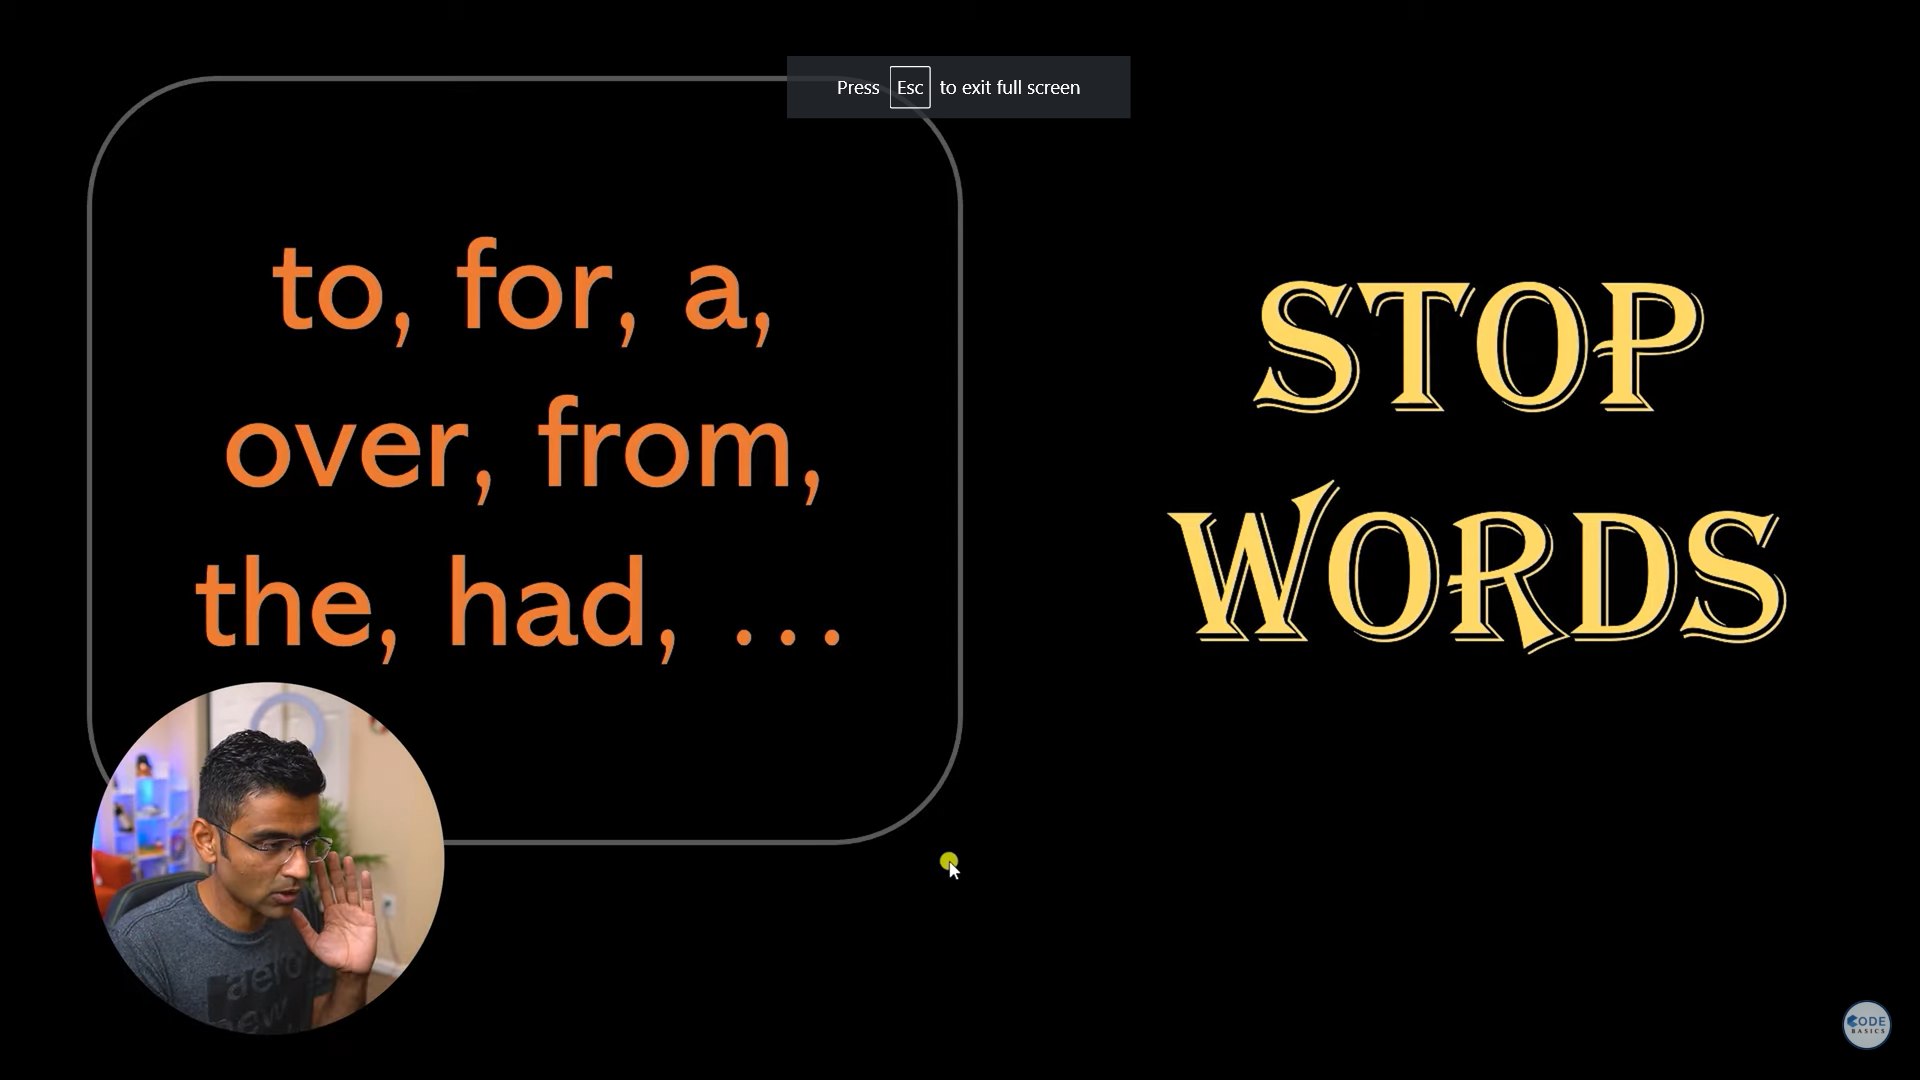

**Where we should not remove stop words ?**

Any case where valuable information is lost
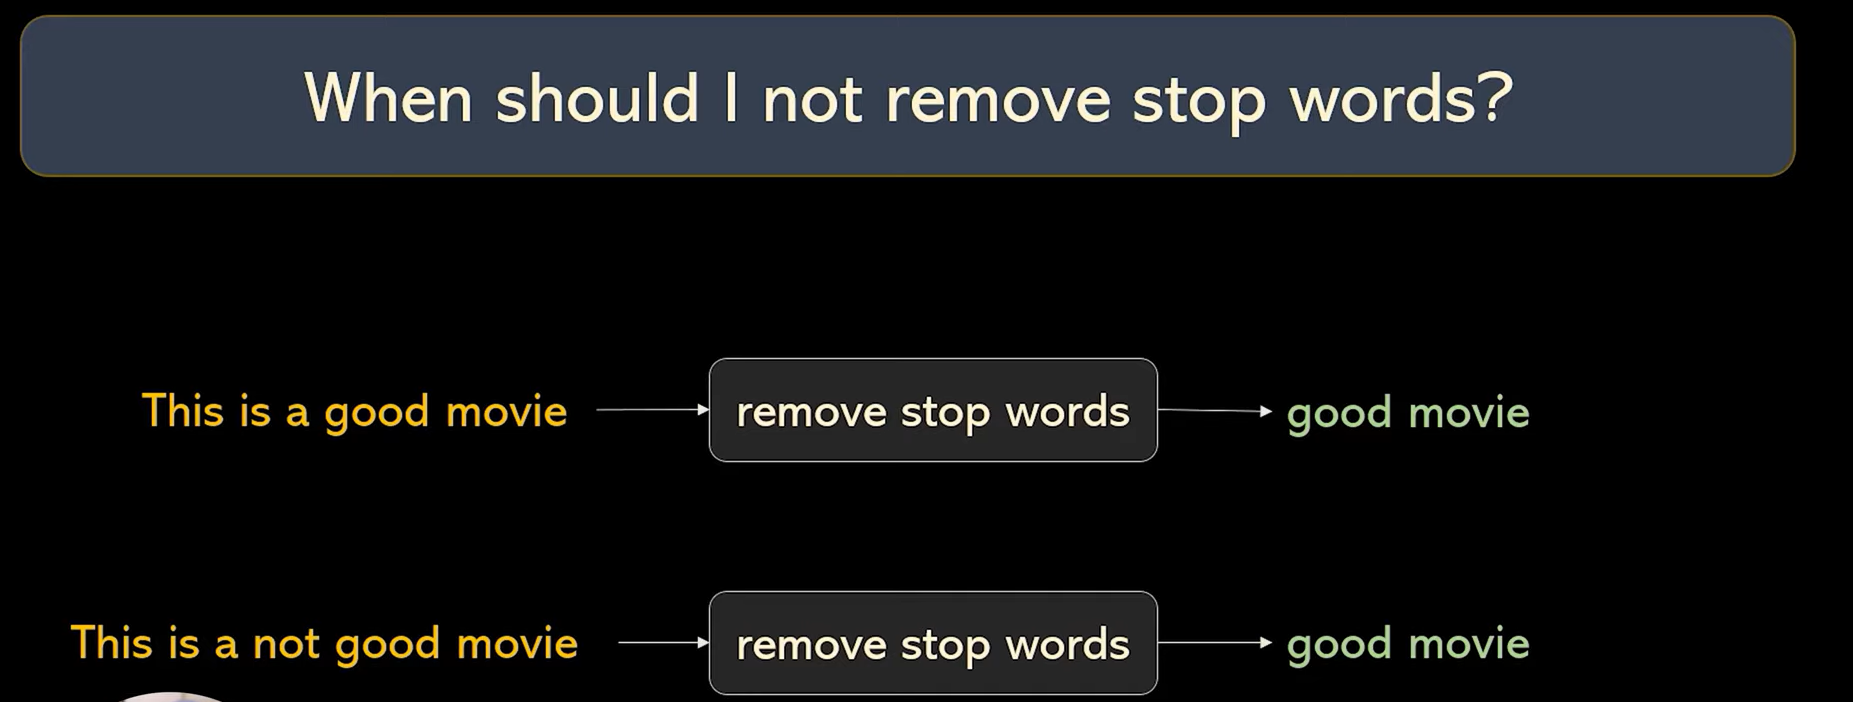

Language Translation
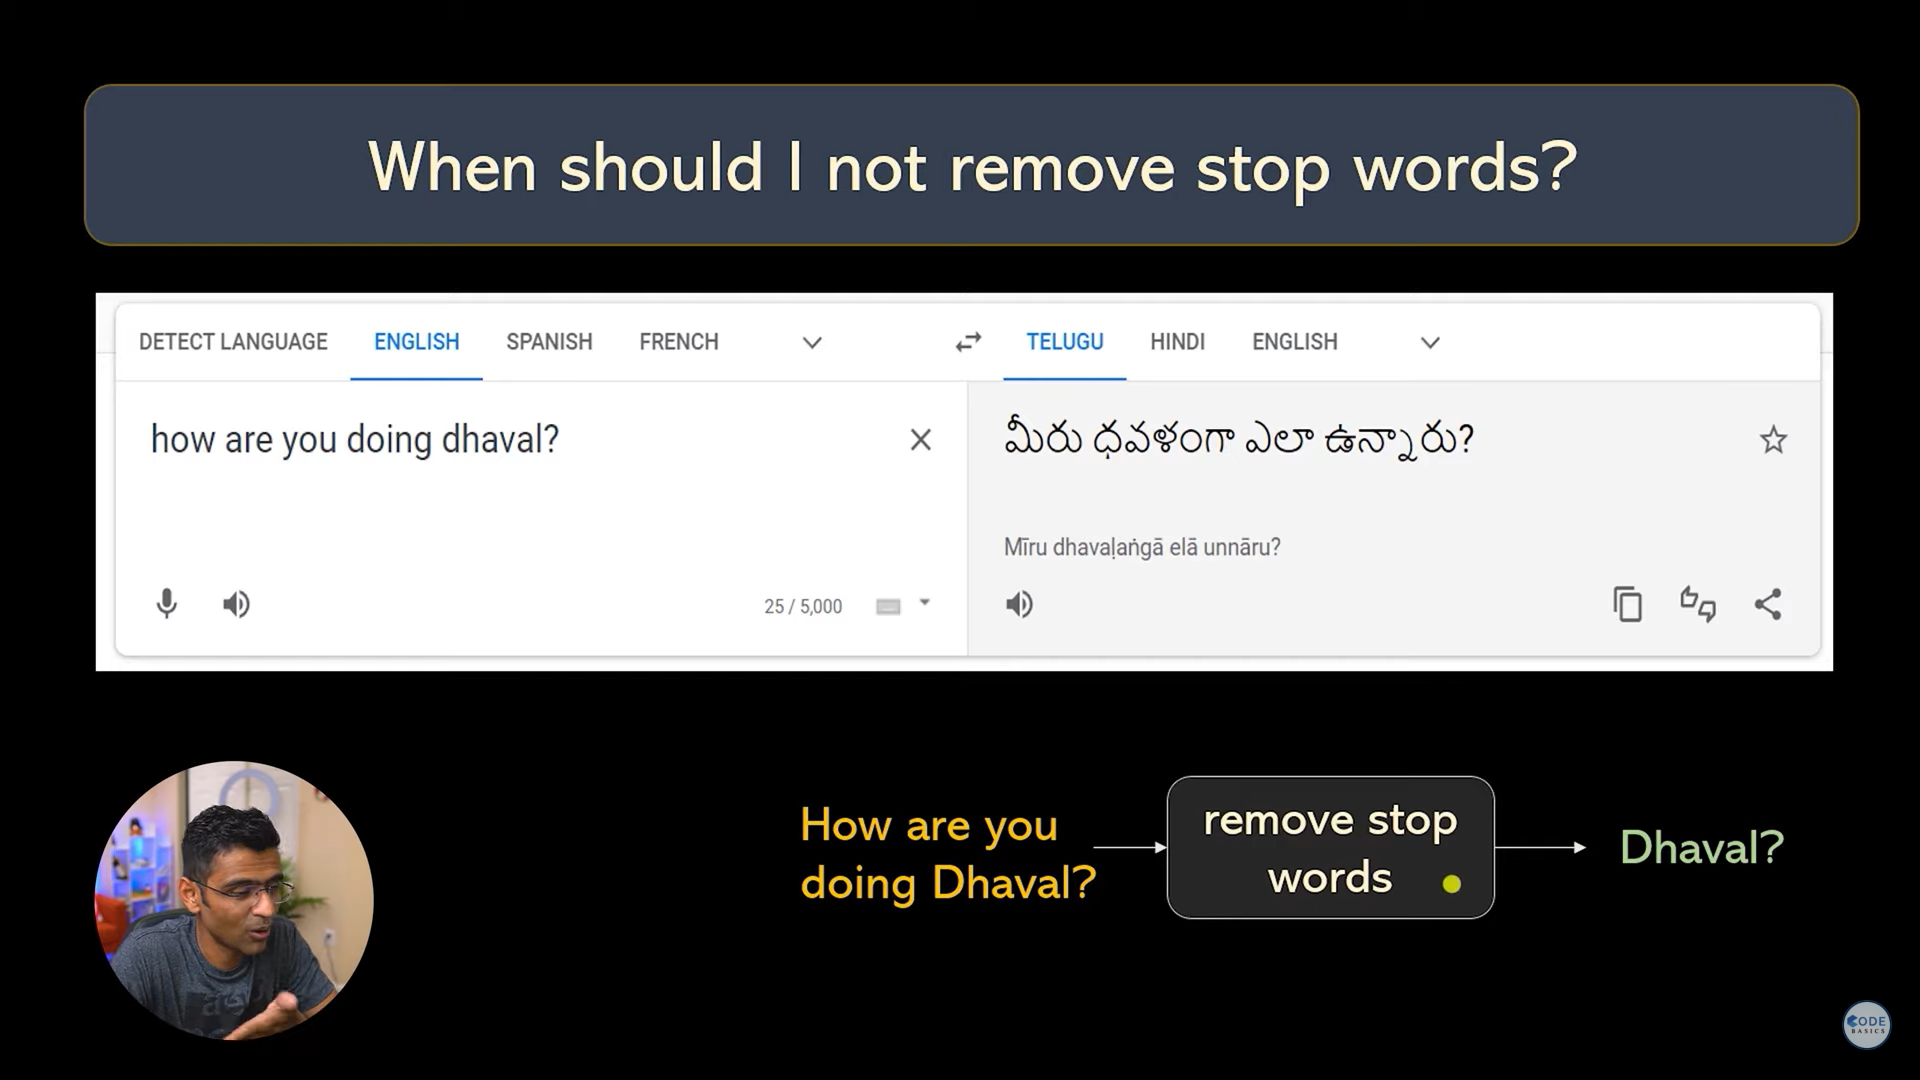

Chat bot and QA system
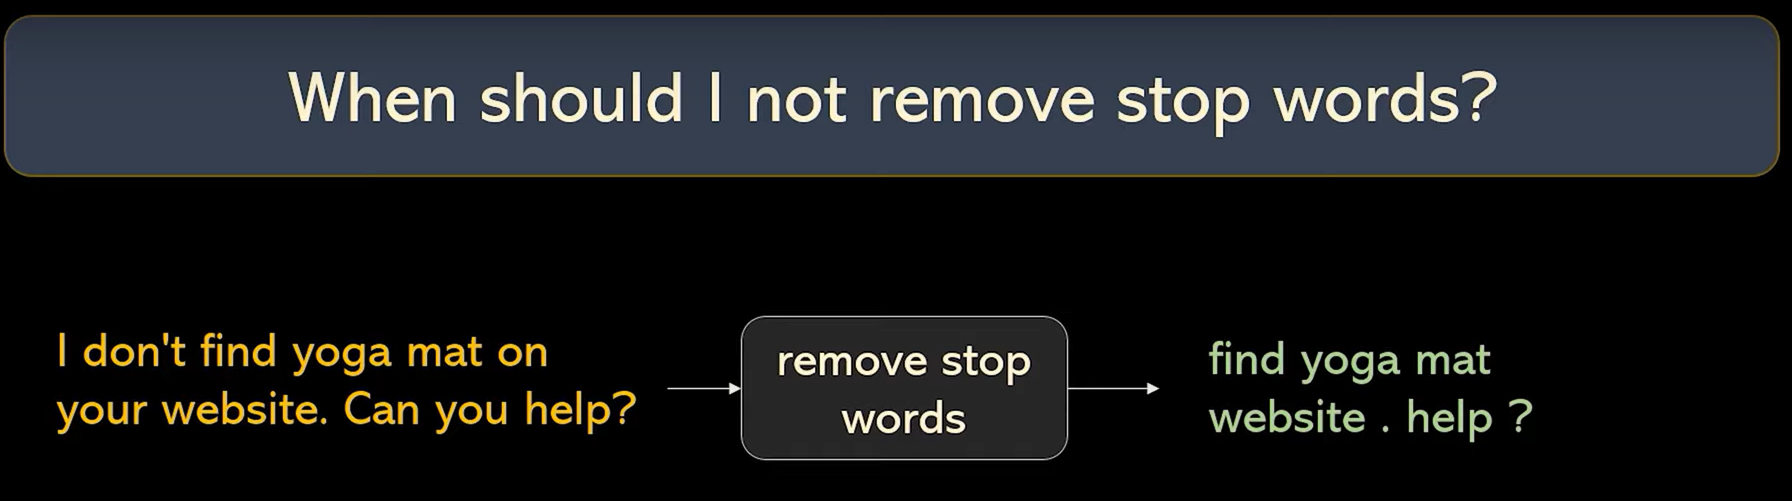

In [126]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [128]:
# getting all the stop words
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [129]:
len(STOP_WORDS)

326

In [148]:
# loading the model
nlp = spacy.load("en_core_web_sm")

#getting stop words from a given text
doc = nlp("We just opened our wings, the flying part is coming soon")

for token in doc:
    if token.is_stop:
        print(token)

C:\Users\Sharath chandra\AppData\Roaming\Python\Python38\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


We
just
our
the
part
is


In [149]:
# getting the text after removing stop words
doc = nlp("We just opened our wings, the flying part is coming soon")

for token in doc:
    if not token.is_stop:
        print(token)

opened
wings
,
flying
coming
soon


In [150]:
# In the above code we can observe that it is not handling punctuations
doc = nlp("We just opened our wings, the flying part is coming soon")

for token in doc:
    if not token.is_stop and not token.is_punct:
        print(token)

opened
wings
flying
coming
soon


In [155]:
def preprocess(text):
    doc=nlp(text)
    no_stop_words=[]
    for token in doc:
        if not token.is_stop and not token.is_punct:
            no_stop_words.append(token.text)
    return " ".join(no_stop_words)

In [156]:
preprocess("We just opened our wings, the flying part is coming soon")

'opened wings flying coming soon'

# Removing stop words from a dataset

In [157]:
import pandas as pd
import numpy as np

In [158]:
data=pd.read_json("D:\programming languages\datasets\court_cases_from_DOJ.json",lines=True)

In [159]:
data

id                                              title  \
0         None       Convicted Bomb Plotter Sentenced to 30 Years   
1      12-919   $1 Million in Restitution Payments Announced t...   
2      11-1002  $1 Million Settlement Reached for Natural Reso...   
3       10-015  10 Las Vegas Men Indicted \r\nfor Falsifying V...   
4       18-898  $100 Million Settlement Will Speed Cleanup Wor...   
...        ...                                                ...   
13082   16-735  Yuengling to Upgrade Environmental Measures to...   
13083   10-473  Zarein Ahmedzay Pleads Guilty to Terror Violat...   
13084   17-045  Zimmer Biomet Holdings Inc. Agrees to Pay $17....   
13085   17-252  ZTE Corporation Agrees to Plead Guilty and Pay...   
13086   17-304  ZTE Corporation Pleads Guilty for  Violating U...   

                                                contents  \
0      PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...   
1        WASHINGTON – North Carolina’s Waccamaw River...   
2            BOSTON– A $1-million settlement has been...   
3        WASHINGTON—A federal grand jury in Las Vegas...   
4      The U.S. Department of Justice, the U.S. Envir...   
...                                                  ...   
13082  The Department of Justice and the U.S. Environ...   
13083    The Justice Department announced that Zarein...   
13084  Subsidiary Agrees to Plead Guilty to Violating...   
13085  ZTE Corporation has agreed to enter a guilty p...   
13086  ZTE Corporation pleaded guilty today to conspi...   

                            date  \
0      2014-10-01T00:00:00-04:00   
1      2012-07-25T00:00:00-04:00   
2      2011-08-03T00:00:00-04:00   
3      2010-01-08T00:00:00-05:00   
4      2018-07-09T00:00:00-04:00   
...                          ...   
13082  2016-06-23T00:00:00-04:00   
13083  2010-04-23T00:00:00-04:00   
13084  2017-01-12T00:00:00-05:00   
13085  2017-03-07T00:00:00-05:00   
13086  2017-03-22T00:00:00-04:00   

                                                  topics  \
0                                                     []   
1                                                     []   
2                                                     []   
3                                                     []   
4                                          [Environment]   
...                                                  ...   
13082                                      [Environment]   
13083                                                 []   
13084                               [Foreign Corruption]   
13085  [Asset Forfeiture, Counterintelligence and Exp...   
13086           [Counterintelligence and Export Control]   

                                              components  
0                     [National Security Division (NSD)]  
1           [Environment and Natural Resources Division]  
2           [Environment and Natural Resources Division]  
3           [Environment and Natural Resources Division]  
4           [Environment and Natural Resources Division]  
...                                                  ...  
13082       [Environment and Natural Resources Division]  
13083                   [Office of the Attorney General]  
13084  [Criminal Division, Criminal - Criminal Fraud ...  
13085  [National Security Division (NSD), USAO - Texa...  
13086  [National Security Division (NSD), USAO - Texa...  

[13087 rows x 6 columns]

Here, we can see that some of the rows are empty in "topics" column

In [164]:
#filtering dataset by removing rows with topics as empty
data=data[data.topics.str.len()!=0]
data

id                                              title  \
4       18-898  $100 Million Settlement Will Speed Cleanup Wor...   
7      14-1412  14 Indicted in Connection with New England Com...   
19     17-1419  2017 Southeast Regional Animal Cruelty Prosecu...   
22     15-1562  21st Century Oncology to Pay $19.75 Million to...   
23     17-1404  21st Century Oncology to Pay $26 Million to Se...   
...        ...                                                ...   
13081  14-1377  Yuba City, California, Man Sentenced to 46 Mon...   
13082   16-735  Yuengling to Upgrade Environmental Measures to...   
13084   17-045  Zimmer Biomet Holdings Inc. Agrees to Pay $17....   
13085   17-252  ZTE Corporation Agrees to Plead Guilty and Pay...   
13086   17-304  ZTE Corporation Pleads Guilty for  Violating U...   

                                                contents  \
4      The U.S. Department of Justice, the U.S. Envir...   
7      A 131-count criminal indictment was unsealed t...   
19     The United States Attorney’s Office for the Mi...   
22     21st Century Oncology LLC, has agreed to pay $...   
23     21st Century Oncology Inc. and certain of its ...   
...                                                  ...   
13081  Anthony Merrell Tyler, 34, of Yuba City, Calif...   
13082  The Department of Justice and the U.S. Environ...   
13084  Subsidiary Agrees to Plead Guilty to Violating...   
13085  ZTE Corporation has agreed to enter a guilty p...   
13086  ZTE Corporation pleaded guilty today to conspi...   

                            date  \
4      2018-07-09T00:00:00-04:00   
7      2014-12-17T00:00:00-05:00   
19     2017-12-14T00:00:00-05:00   
22     2015-12-18T00:00:00-05:00   
23     2017-12-12T00:00:00-05:00   
...                          ...   
13081  2014-12-09T00:00:00-05:00   
13082  2016-06-23T00:00:00-04:00   
13084  2017-01-12T00:00:00-05:00   
13085  2017-03-07T00:00:00-05:00   
13086  2017-03-22T00:00:00-04:00   

                                                  topics  \
4                                          [Environment]   
7                                  [Consumer Protection]   
19                                         [Environment]   
22                 [False Claims Act, Health Care Fraud]   
23                 [Health Care Fraud, False Claims Act]   
...                                                  ...   
13081                                      [Hate Crimes]   
13082                                      [Environment]   
13084                               [Foreign Corruption]   
13085  [Asset Forfeiture, Counterintelligence and Exp...   
13086           [Counterintelligence and Export Control]   

                                              components  
4           [Environment and Natural Resources Division]  
7                                       [Civil Division]  
19     [Environment and Natural Resources Division, U...  
22                                      [Civil Division]  
23              [Civil Division, USAO - Florida, Middle]  
...                                                  ...  
13081  [Civil Rights Division, Civil Rights - Crimina...  
13082       [Environment and Natural Resources Division]  
13084  [Criminal Division, Criminal - Criminal Fraud ...  
13085  [National Security Division (NSD), USAO - Texa...  
13086  [National Security Division (NSD), USAO - Texa...  

[4688 rows x 6 columns]

Here, our main focus is to remove stop words from a dataset. So hence considering only small sample of the dataset.

In [166]:
sample=data.sample(100)
sample

id                                              title  \
12862   18-635  Virginia Man Pleads Guilty to Producing and Di...   
12857   18-811  Virginia Man Pleads Guilty to Enticement of a ...   
10181  11-1702  Principal and Co-Owner of North Carolina Compa...   
10039   17-885  PHH Agrees to Pay Over $74 Million to Resolve ...   
1039    13-682  Axius CEO Roland Kaufmann Sentenced for\r\nCon...   
...        ...                                                ...   
1294    16-057  California Hospital to Pay More Than $3.2 Mill...   
2411    16-683  Departments of Justice and Housing and Urban D...   
10986   17-214  Statement by Attorney General Jeff Sessions on...   
11837   15-316  Two Florida Brothers Plead Guilty to Terrorism...   
5654    16-018  International Operation Concludes in Montana; ...   

                                                contents  \
12862  A Manassas Park, Virginia man pleaded guilty t...   
12857  A Roanoke, Virginia man pleaded guilty yesterd...   
10181    WASHINGTON – The principal and co-owner of I...   
10039  PHH Corp. PHH Mortgage Corp. and PHH Home Loan...   
1039     Roland Kaufmann, CEO of Axius Inc., was sent...   
...                                                  ...   
1294   Tri-City Medical Center, a hospital located in...   
2411   Joint Demonstration to Enhance Coordination be...   
10986  The Department of Justice and the Department o...   
11837  Younger Sibling Plotted to Attack New York Cit...   
5654   An international operation that led to the con...   

                            date                                 topics  \
12862  2018-05-16T00:00:00-04:00               [Project Safe Childhood]   
12857  2018-06-20T00:00:00-04:00               [Project Safe Childhood]   
10181  2011-12-22T00:00:00-05:00                            [StopFraud]   
10039  2017-08-08T00:00:00-04:00                     [False Claims Act]   
1039   2013-06-14T00:00:00-04:00                            [StopFraud]   
...                          ...                                    ...   
1294   2016-01-15T00:00:00-05:00  [False Claims Act, Health Care Fraud]   
2411   2016-06-14T00:00:00-04:00                               [Grants]   
10986  2017-02-22T00:00:00-05:00                         [Civil Rights]   
11837  2015-03-12T00:00:00-04:00  [Counterterrorism, National Security]   
5654   2016-01-07T00:00:00-05:00               [Project Safe Childhood]   

                                              components  
12862  [Criminal Division, Criminal - Child Exploitat...  
12857  [Criminal Division, Criminal - Child Exploitat...  
10181                                [Criminal Division]  
10039  [Civil Division, USAO - Florida, Southern, USA...  
1039                                 [Criminal Division]  
...                                                  ...  
1294                                    [Civil Division]  
2411                  [Office on Violence Against Women]  
10986  [Civil Rights Division, Civil Rights - Educati...  
11837                 [National Security Division (NSD)]  
5654   [Criminal Division, Criminal - Child Exploitat...  

[100 rows x 6 columns]

In [167]:
def preprocess(text):
    doc=nlp(text)
    no_stop_words=[]
    for token in doc:
        if not token.is_stop and not token.is_punct:
            no_stop_words.append(token.text)
    return " ".join(no_stop_words)

In [168]:
# applying preprocess function on 'contents'
sample['contents_new']=sample['contents'].apply(preprocess)

In [169]:
sample

id                                              title  \
12862   18-635  Virginia Man Pleads Guilty to Producing and Di...   
12857   18-811  Virginia Man Pleads Guilty to Enticement of a ...   
10181  11-1702  Principal and Co-Owner of North Carolina Compa...   
10039   17-885  PHH Agrees to Pay Over $74 Million to Resolve ...   
1039    13-682  Axius CEO Roland Kaufmann Sentenced for\r\nCon...   
...        ...                                                ...   
1294    16-057  California Hospital to Pay More Than $3.2 Mill...   
2411    16-683  Departments of Justice and Housing and Urban D...   
10986   17-214  Statement by Attorney General Jeff Sessions on...   
11837   15-316  Two Florida Brothers Plead Guilty to Terrorism...   
5654    16-018  International Operation Concludes in Montana; ...   

                                                contents  \
12862  A Manassas Park, Virginia man pleaded guilty t...   
12857  A Roanoke, Virginia man pleaded guilty yesterd...   
10181    WASHINGTON – The principal and co-owner of I...   
10039  PHH Corp. PHH Mortgage Corp. and PHH Home Loan...   
1039     Roland Kaufmann, CEO of Axius Inc., was sent...   
...                                                  ...   
1294   Tri-City Medical Center, a hospital located in...   
2411   Joint Demonstration to Enhance Coordination be...   
10986  The Department of Justice and the Department o...   
11837  Younger Sibling Plotted to Attack New York Cit...   
5654   An international operation that led to the con...   

                            date                                 topics  \
12862  2018-05-16T00:00:00-04:00               [Project Safe Childhood]   
12857  2018-06-20T00:00:00-04:00               [Project Safe Childhood]   
10181  2011-12-22T00:00:00-05:00                            [StopFraud]   
10039  2017-08-08T00:00:00-04:00                     [False Claims Act]   
1039   2013-06-14T00:00:00-04:00                            [StopFraud]   
...                          ...                                    ...   
1294   2016-01-15T00:00:00-05:00  [False Claims Act, Health Care Fraud]   
2411   2016-06-14T00:00:00-04:00                               [Grants]   
10986  2017-02-22T00:00:00-05:00                         [Civil Rights]   
11837  2015-03-12T00:00:00-04:00  [Counterterrorism, National Security]   
5654   2016-01-07T00:00:00-05:00               [Project Safe Childhood]   

                                              components  \
12862  [Criminal Division, Criminal - Child Exploitat...   
12857  [Criminal Division, Criminal - Child Exploitat...   
10181                                [Criminal Division]   
10039  [Civil Division, USAO - Florida, Southern, USA...   
1039                                 [Criminal Division]   
...                                                  ...   
1294                                    [Civil Division]   
2411                  [Office on Violence Against Women]   
10986  [Civil Rights Division, Civil Rights - Educati...   
11837                 [National Security Division (NSD)]   
5654   [Criminal Division, Criminal - Child Exploitat...   

                                            contents_new  
12862  Manassas Park Virginia man pleaded guilty toda...  
12857  Roanoke Virginia man pleaded guilty yesterday ...  
10181     WASHINGTON principal co owner Integra Capit...  
10039  PHH Corp. PHH Mortgage Corp. PHH Home Loans co...  
1039      Roland Kaufmann CEO Axius Inc. sentenced to...  
...                                                  ...  
1294   Tri City Medical Center hospital located Ocean...  
2411   Joint Demonstration Enhance Coordination HIV H...  
10986  Department Justice Department Education today ...  
11837  Younger Sibling Plotted Attack New York City W...  
5654   international operation led conviction 21 defe...  

[100 rows x 7 columns]

In [178]:
# before removing stop words
sample['contents'].iloc[1]

'A Roanoke, Virginia man pleaded guilty yesterday to charges of enticement of a minor, receipt or attempted receipt of child pornography, and possession of child pornography, announced Acting Assistant Attorney General John P. Cronan of the Justice Department’s Criminal Division and U.S. Attorney Thomas T. Cullen for the Western District of Virginia. Scott Curtiss Pieritz, 57, pleaded guilty before Chief U.S. District Judge Michael F. Urbanski to charges of enticement of a minor, receipt or attempted receipt of child pornography, and possession of child pornography.\xa0 \xa0 In July 2017,\xa0 law enforcement agents were notified that Pieritz, who had a duty to register as a sex offender as a result of three prior child pornography convictions, was using various social media applications to entice minors to produce and send him child pornography.\xa0 A search warrant for his electronic devices confirmed that Pieritz was in possession of numerous images and videos of child pornography, h

In [180]:
# after removing stop words
sample['contents_new'].iloc[1]

'Roanoke Virginia man pleaded guilty yesterday charges enticement minor receipt attempted receipt child pornography possession child pornography announced Acting Assistant Attorney General John P. Cronan Justice Department Criminal Division U.S. Attorney Thomas T. Cullen Western District Virginia Scott Curtiss Pieritz 57 pleaded guilty Chief U.S. District Judge Michael F. Urbanski charges enticement minor receipt attempted receipt child pornography possession child pornography \xa0 \xa0  July 2017 \xa0  law enforcement agents notified Pieritz duty register sex offender result prior child pornography convictions social media applications entice minors produce send child pornography \xa0  search warrant electronic devices confirmed Pieritz possession numerous images videos child pornography posed minor online \xa0 exchanged money gifts images minors defendant admitted conduct interview law enforcement agents Pieritz schedule sentenced Oct. 1 case investigated Virginia State Police \xa0  

# Exercises

**Exercise 1:**          
From a Given Text, Count the number of stop words in it.      
Print the percentage of stop word tokens compared to all tokens in a given text.

In [181]:
text = '''
Thor: Love and Thunder is a 2022 American superhero film based on Marvel Comics featuring the character Thor, produced by Marvel Studios and 
distributed by Walt Disney Studios Motion Pictures. It is the sequel to Thor: Ragnarok (2017) and the 29th film in the Marvel Cinematic Universe (MCU).
The film is directed by Taika Waititi, who co-wrote the script with Jennifer Kaytin Robinson, and stars Chris Hemsworth as Thor alongside Christian Bale, Tessa Thompson,
Jaimie Alexander, Waititi, Russell Crowe, and Natalie Portman. In the film, Thor attempts to find inner peace, but must return to action and recruit Valkyrie (Thompson),
Korg (Waititi), and Jane Foster (Portman)—who is now the Mighty Thor—to stop Gorr the God Butcher (Bale) from eliminating all gods.
'''

In [182]:
#step1: Create the object 'doc' for the given text using nlp()
doc=nlp(text)

In [184]:
#step2: define the variables to keep track of stopwords count and total words count
total_words=0
stop_words=0

In [185]:
#step3: iterate through all the words in the document
for token in doc:
    if token.is_stop:
        stop_words+=1
    total_words+=1

In [186]:
#step4: print the count of stop words
print("Total count of stop words :",stop_words)

Total count of stop words : 40


In [188]:
#step5: print the percentage of stop words compared to total words in the text
print("Percentage of stop words :",(stop_words/total_words)*100,"%")

Percentage of stop words : 25.0 %


**Exercise 2 :**
Spacy default implementation considers "not" as a stop word. But in some scenarios removing 'not' will completely change the meaning of the statement/text. For Example, consider these two statements:

- this is a good movie       ----> Positive Statement
- this is not a good movie   ----> Negative Statement

So, after applying stopwords to those 2 texts, both will return "good movie" and does not respect the polarity/sentiments of text.

Now, your task is to remove this stop word "not" in spaCy and help in distinguishing the texts.

In [198]:
def preprocess(text):
    no_stop_words=[]
    doc=nlp(text)
    for token in doc:
        if not token.is_stop and not token.is_punct:
            no_stop_words.append(token.text)
    return " ".join(no_stop_words)

In [199]:
# defining "not" as not a stop word 
nlp.vocab['not'].is_stop=False

In [203]:
positive_text=preprocess("This is a good movie.")
negative_text=preprocess("This is not a good movie.")

In [204]:
print(f"Text1: {positive_text}")
print(f"Text2: {negative_text}")

Text1: good movie
Text2: not good movie


**Exercice 3:**  
From a given text, output the **most frequently** used token after removing all the stop word tokens and punctuations in it.

In [205]:
text = ''' The India men's national cricket team, also known as Team India or the Men in Blue, represents India in men's international cricket.
It is governed by the Board of Control for Cricket in India (BCCI), and is a Full Member of the International Cricket Council (ICC) with Test,
One Day International (ODI) and Twenty20 International (T20I) status. Cricket was introduced to India by British sailors in the 18th century, and the 
first cricket club was established in 1792. India's national cricket team played its first Test match on 25 June 1932 at Lord's, becoming the sixth team to be
granted test cricket status.
'''

In [206]:
preprocessed_text=preprocess(text)
preprocessed_text

'  India men national cricket team known Team India Men Blue represents India men international cricket \n governed Board Control Cricket India BCCI Member International Cricket Council ICC Test \n Day International ODI Twenty20 International T20I status Cricket introduced India British sailors 18th century \n cricket club established 1792 India national cricket team played Test match 25 June 1932 Lord sixth team \n granted test cricket status \n'

In [209]:
dct=dict()
for word in preprocessed_text.split():
    if word not in ['\n',' ']:
        if word not in dct.keys():
            dct[word]=1
        else:
            dct[word]+=1


In [211]:
#getting the frequent word from the dictionary
frequent_word=max(dct.keys(),key=(lambda x : dct[x]))
frequent_word

'India'

# Bag of n-grams
**Note :** Bag  of 1-gram --> Bag of words

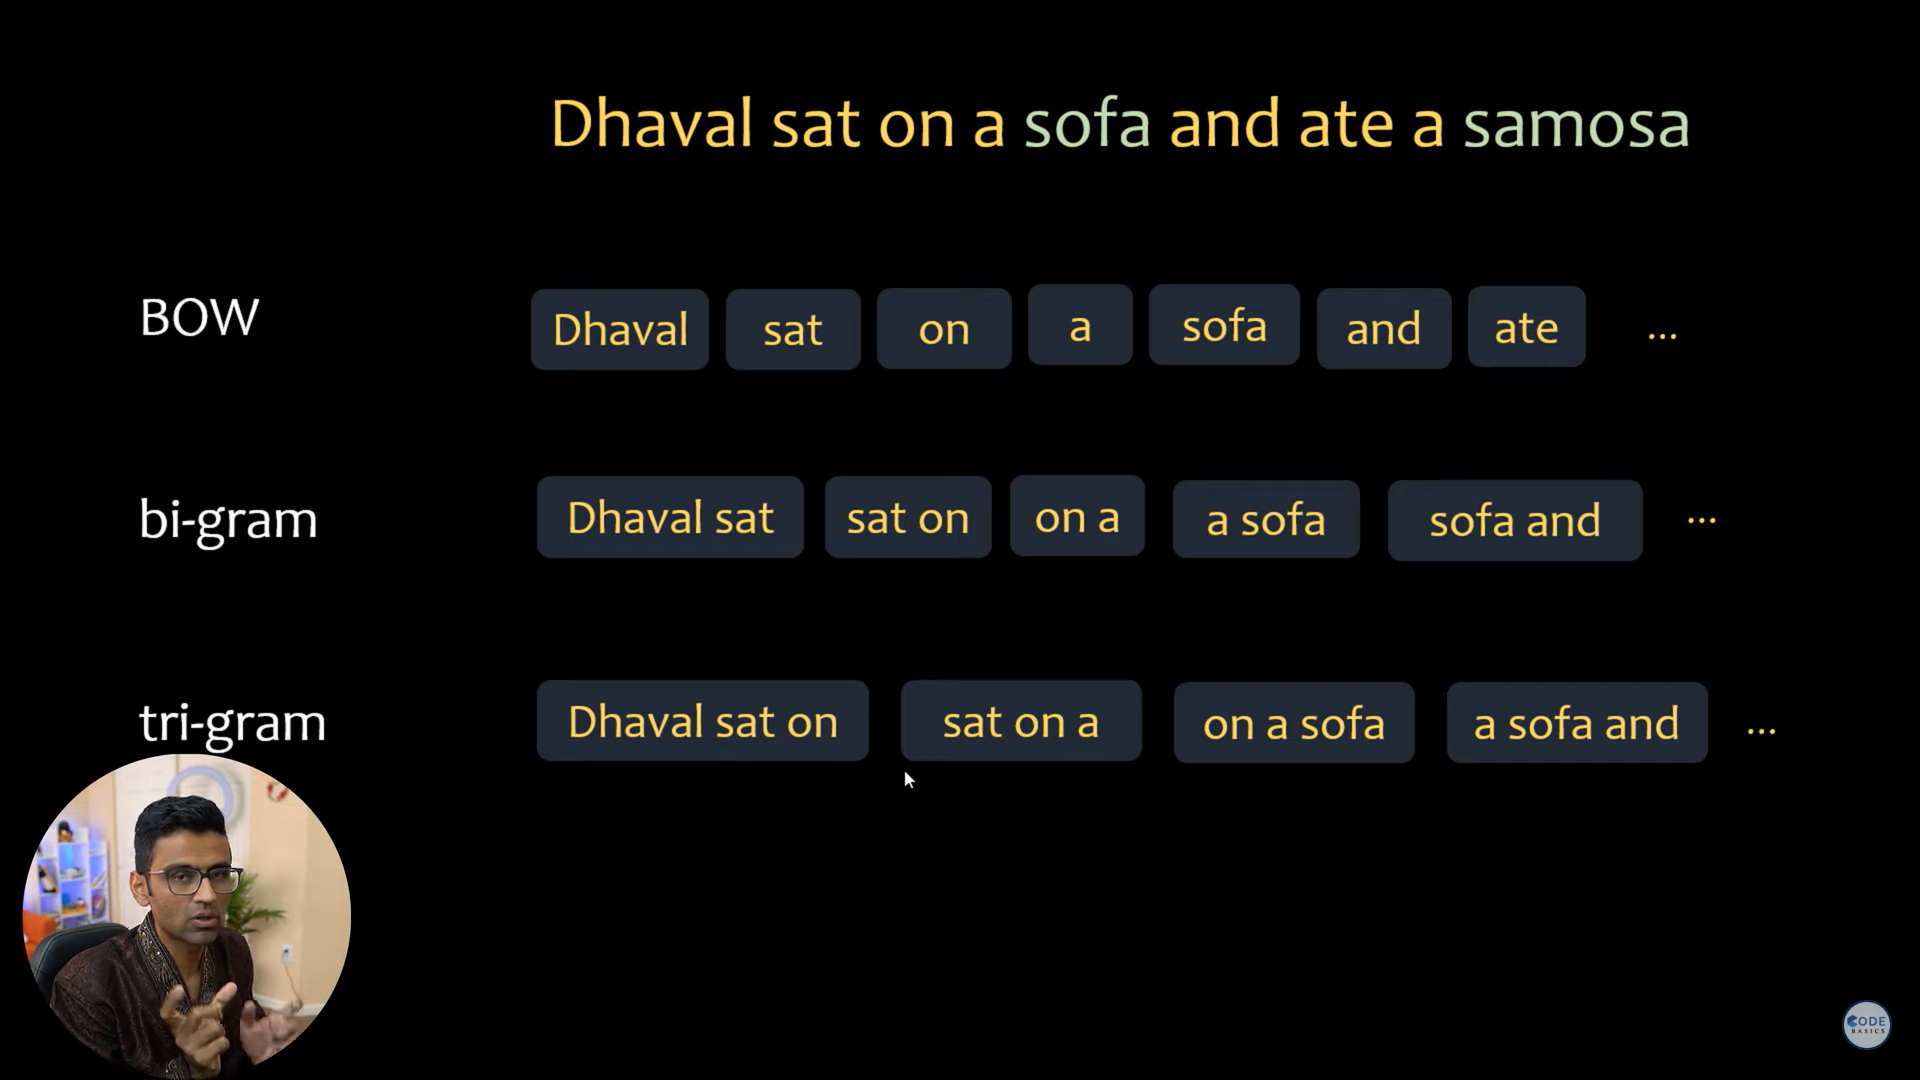

Bag of words
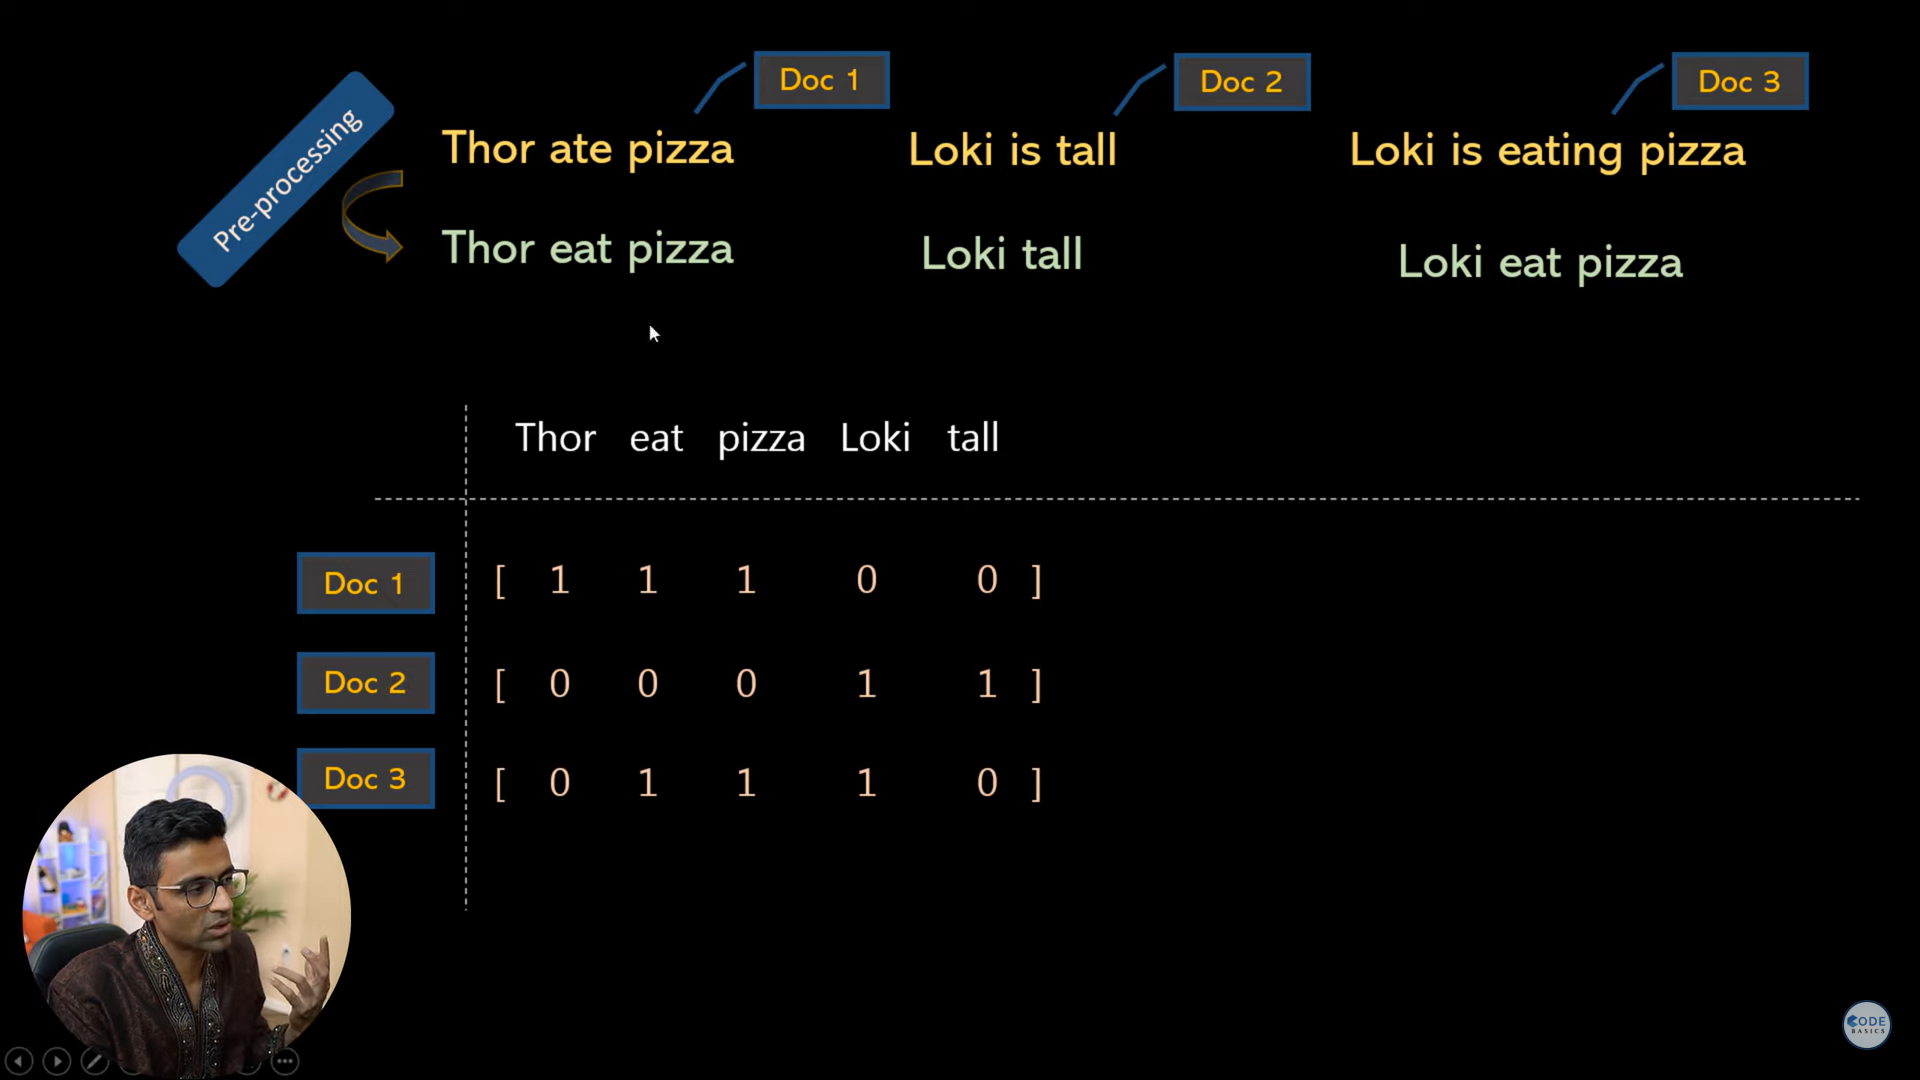

Bi-gram
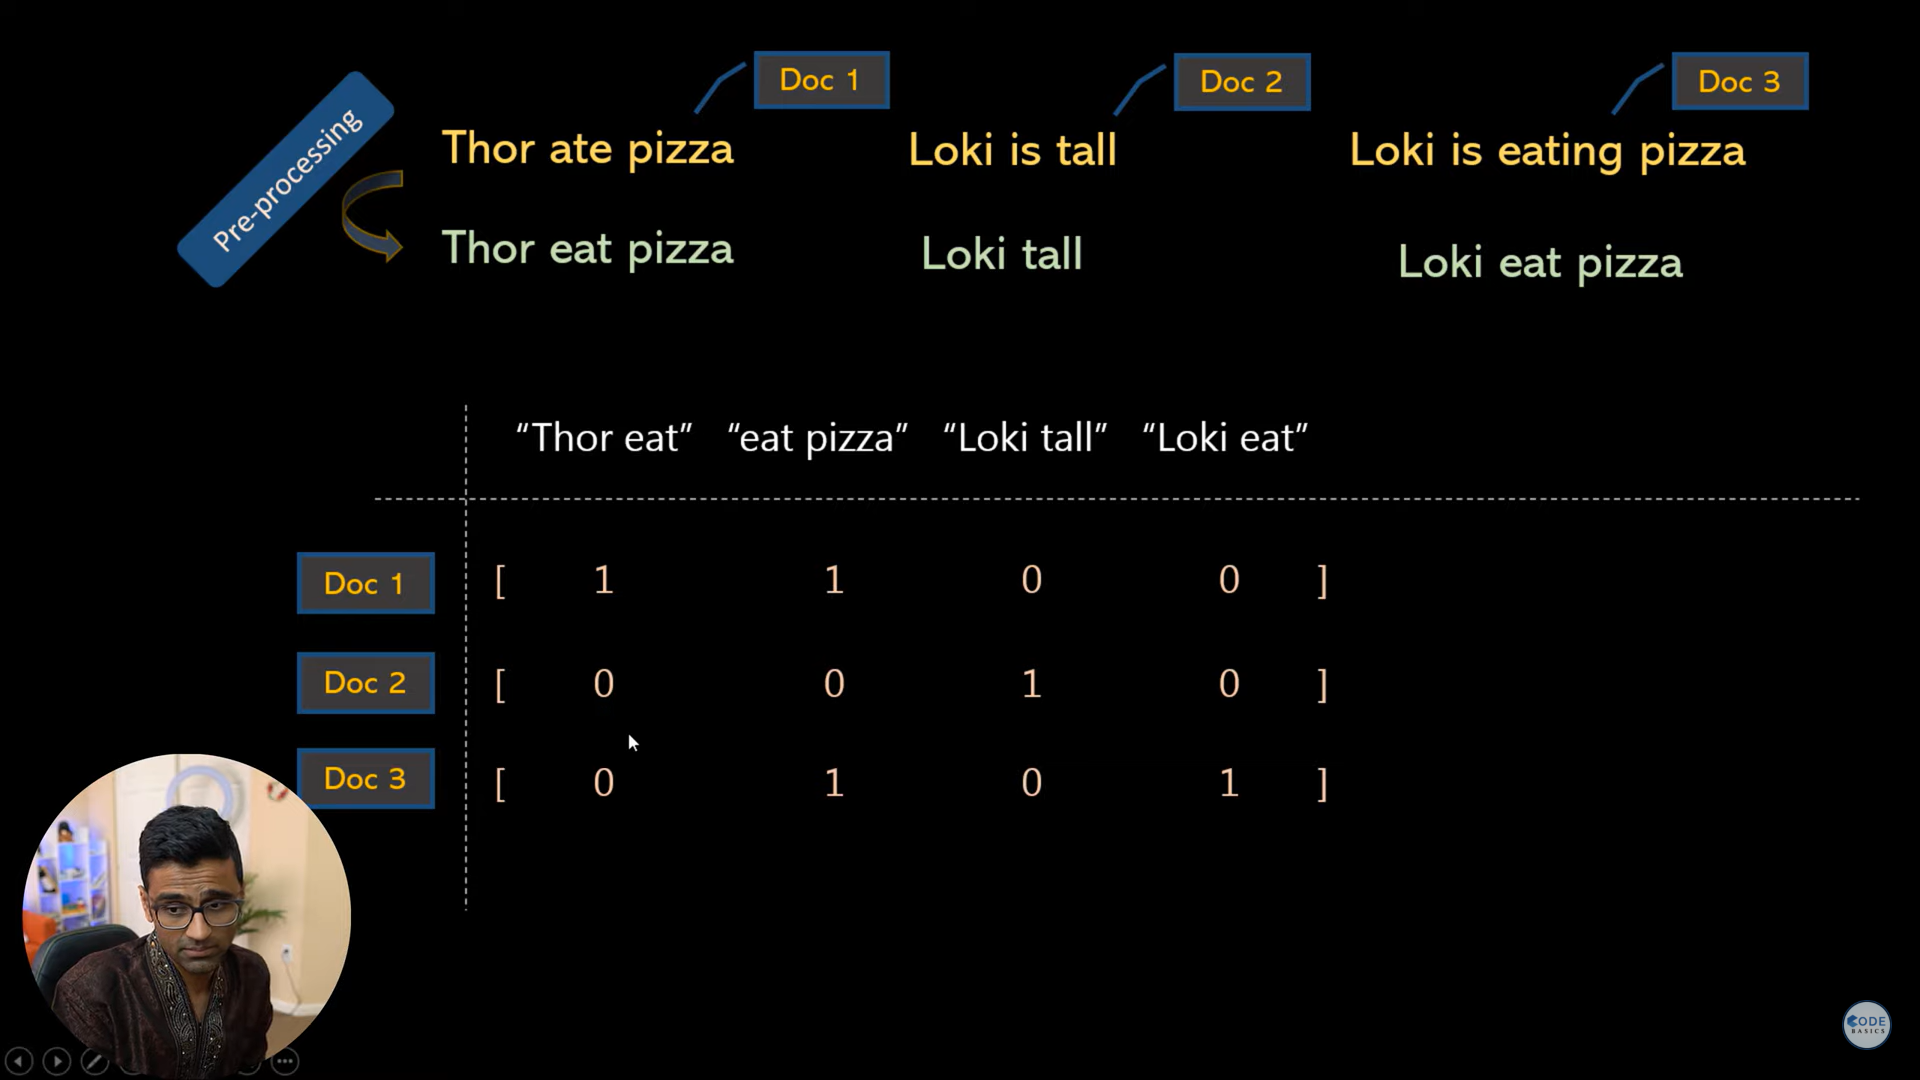

Combination of Bag of words and Bi-gram
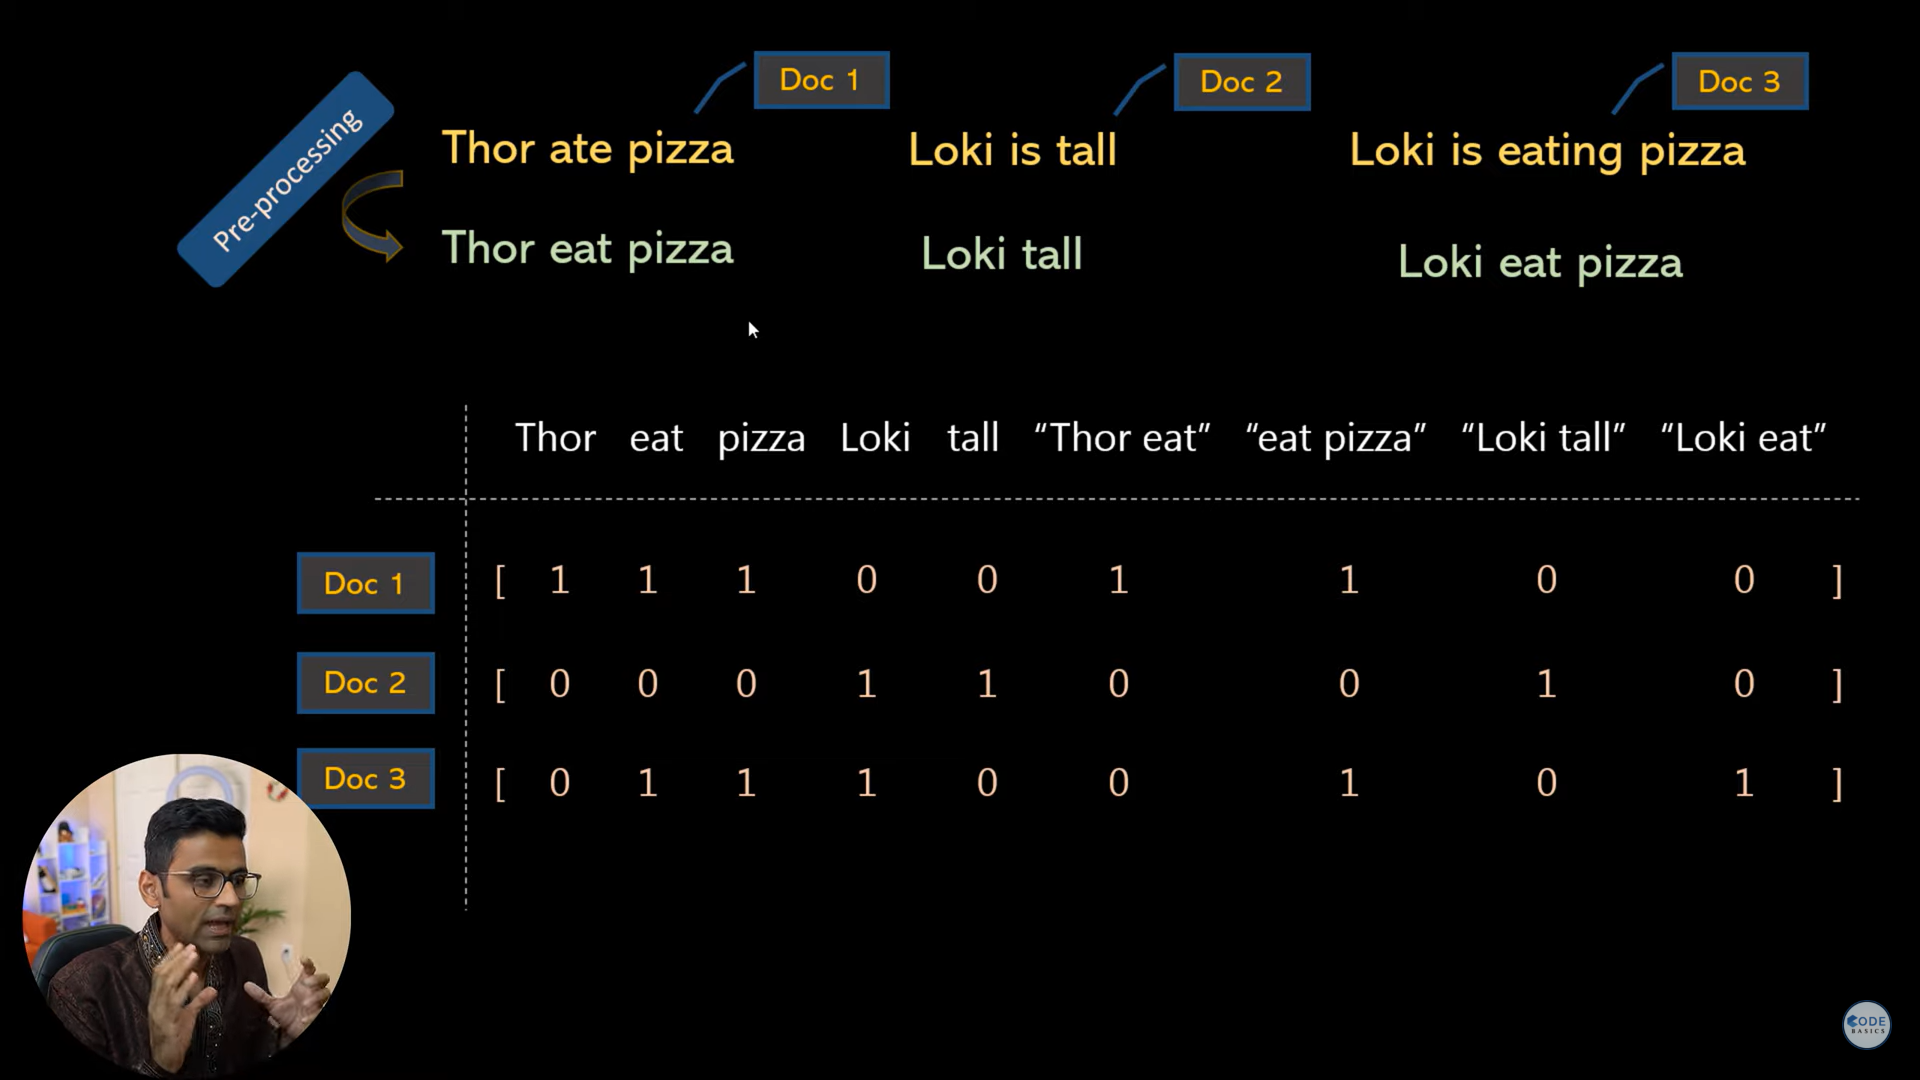

**Limitations :**
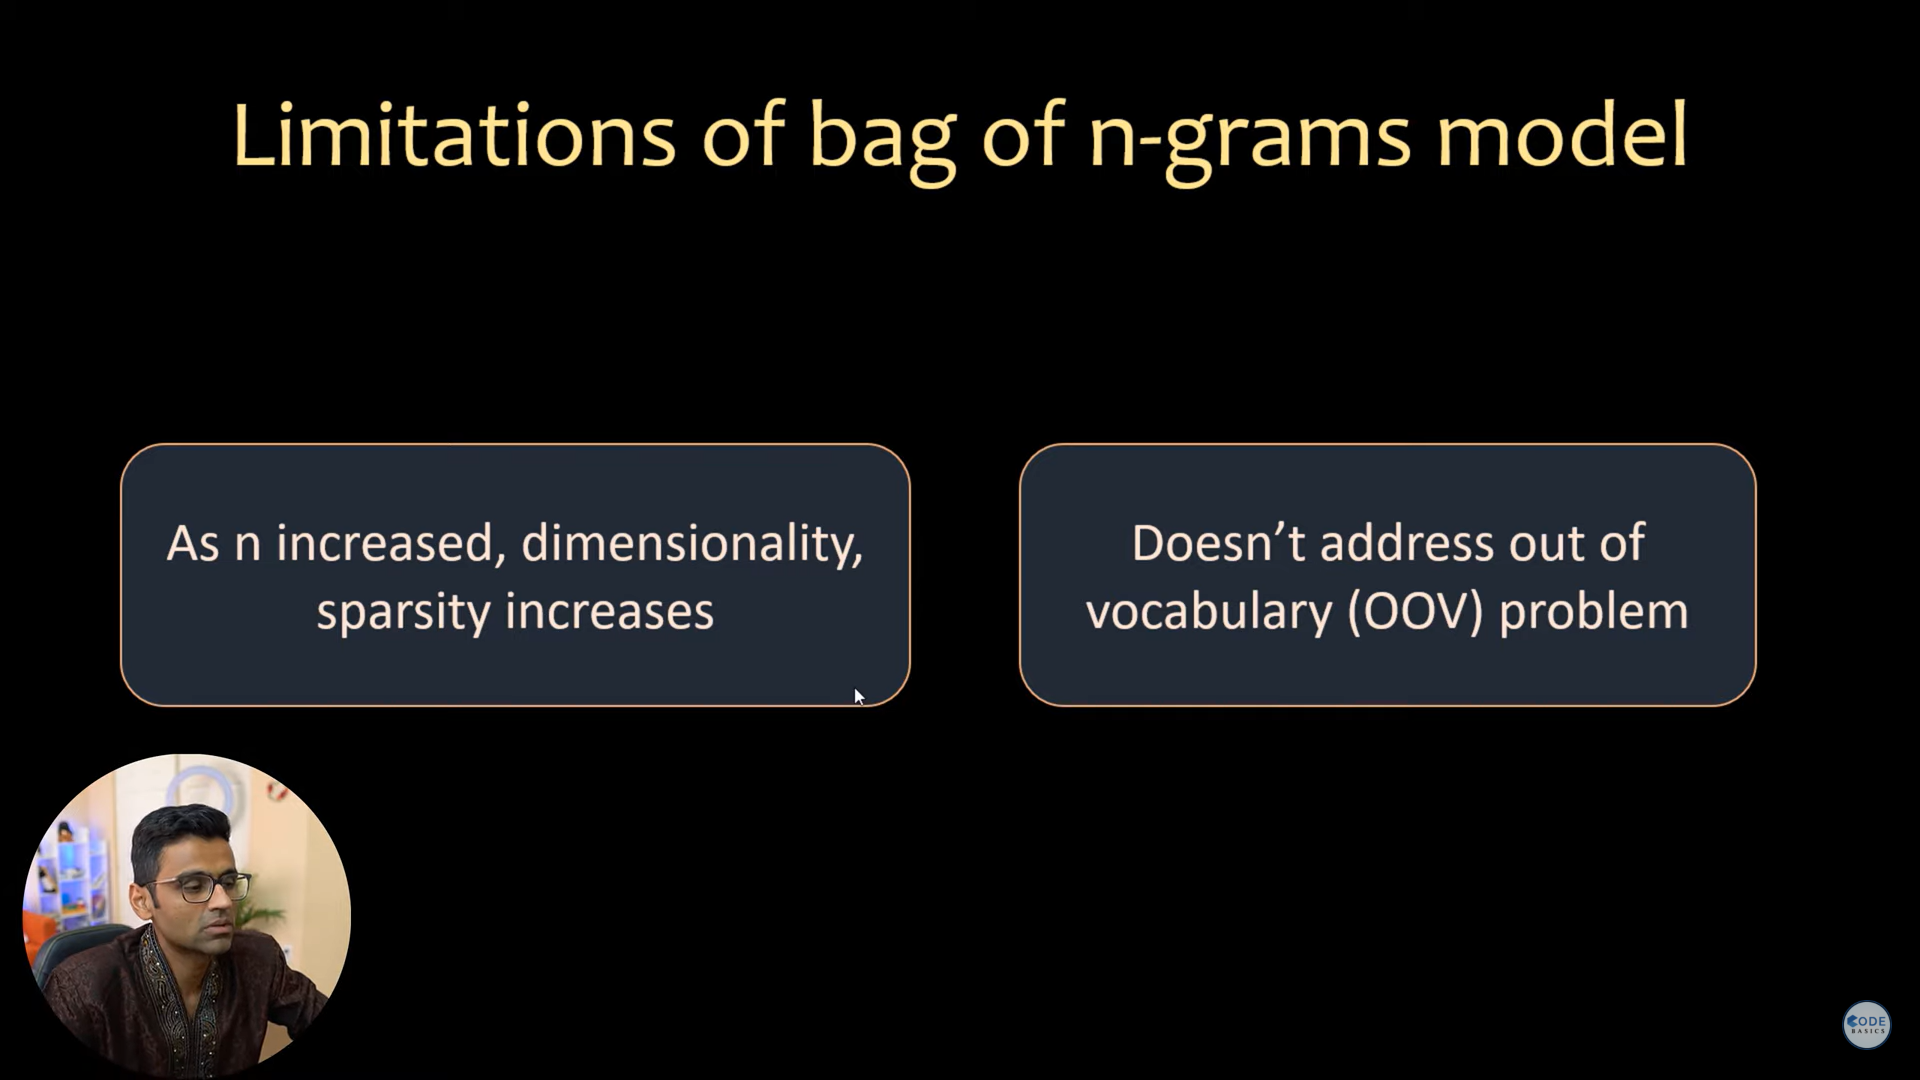

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# bag of 1-gram
cv = CountVectorizer()
vectorized = cv.fit_transform(["Thor Hathodawala is looking for a job"])
cv.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [8]:
cv.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [10]:
# bi-gram
cv = CountVectorizer(ngram_range=(2, 2))
vectorized = cv.fit_transform(["Thor Hathodawala is looking for a job"])
cv.vocabulary_

{'thor hathodawala': 4,
 'hathodawala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for job': 0}

In [11]:
# tri-gram
cv = CountVectorizer(ngram_range=(3, 3))
vectorized = cv.fit_transform(["Thor Hathodawala is looking for a job"])
cv.vocabulary_

{'thor hathodawala is': 3,
 'hathodawala is looking': 0,
 'is looking for': 1,
 'looking for job': 2}

In [12]:
# Combination of 1-gram and bi-gram
cv = CountVectorizer(ngram_range=(1, 2))
vectorized = cv.fit_transform(["Thor Hathodawala is looking for a job"])
cv.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [13]:
# Combination of 1-gram and tri-gram
cv = CountVectorizer(ngram_range=(1, 3))
vectorized = cv.fit_transform(["Thor Hathodawala is looking for a job"])
cv.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

We will not take a simple collection of text documents, preprocess them to remove stop words, lemmatize etc and then generate bag of 1 grams and 2 grams from it

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import spacy
nlp=spacy.load("en_core_web_sm")

In [19]:
# function to remove stop words and apply lemmatization
def preprocess(text):
    doc = nlp(text)
    preprocessed = []
    for token in doc:
        if not token.is_stop and not token.is_punct:
            preprocessed.append(token.lemma_)
    return " ".join(preprocessed)

In [20]:
preprocess("Thor ate pizza")

'Thor eat pizza'

In [21]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [22]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['Thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [23]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [24]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [25]:
# Let's take a document that has out of vocabulary (OOV) term and see how bag of ngram generates vector out of it
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

# News Category Classification Problem
Okay now that we know basics of BAG of n grams vectorizer 😎 It is the time to work on a real problem. Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

1. BUSINESS
2. SPORTS
3. CRIME
4. SCIENCE

In [26]:
import pandas as pd
import numpy as np

In [34]:
data = pd.read_json(r"D:\programming languages\datasets\News_Category_Dataset_v3.json",lines=True)

In [35]:
data

link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3       The Funniest Tweets From Parents This Week (Se...  PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
...                                                   ...        ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...     SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...     SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...     SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...     SPORTS   

                                        short_description  \
0       Health experts said it is too early to predict...   
1       He was subdued by passengers and crew when he ...   
2       "Until you have a dog you don't understand wha...   
3       "Accidentally put grown-up toothpaste on my to...   
4       Amy Cooper accused investment firm Franklin Te...   
...                                                   ...   
209522  Verizon Wireless and AT&T are already promotin...   
209523  Afterward, Azarenka, more effusive with the pr...   
209524  Leading up to Super Bowl XLVI, the most talked...   
209525  CORRECTION: An earlier version of this story i...   
209526  The five-time all-star center tore into his te...   

                     authors       date  
0       Carla K. Johnson, AP 2022-09-23  
1             Mary Papenfuss 2022-09-23  
2              Elyse Wanshel 2022-09-23  
3           Caroline Bologna 2022-09-23  
4             Nina Golgowski 2022-09-22  
...                      ...        ...  
209522      Reuters, Reuters 2012-01-28  
209523                       2012-01-28  
209524                       2012-01-28  
209525                       2012-01-28  
209526                       2012-01-28  

[209527 rows x 6 columns]

In [39]:
np.unique(data.category)

array(['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COLLEGE',
       'COMEDY', 'CRIME', 'CULTURE & ARTS', 'DIVORCE', 'EDUCATION',
       'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY', 'FOOD & DRINK',
       'GOOD NEWS', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'IMPACT',
       'LATINO VOICES', 'MEDIA', 'MONEY', 'PARENTING', 'PARENTS',
       'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS',
       'STYLE', 'STYLE & BEAUTY', 'TASTE', 'TECH', 'THE WORLDPOST',
       'TRAVEL', 'U.S. NEWS', 'WEDDINGS', 'WEIRD NEWS', 'WELLNESS',
       'WOMEN', 'WORLD NEWS', 'WORLDPOST'], dtype=object)

In [43]:
data.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [70]:
min_samples = 1000
categories = ['SCIENCE','CRIME','SPORTS','BUSINESS']
final_df = pd.DataFrame()
for category in categories:
    temp = data[data.category == category].sample(min_samples,random_state = 3)
    final_df = pd.concat([final_df,temp],axis = 0)
final_df

link  \
135428  https://www.huffingtonpost.com/entry/mousetrap...   
118354  https://www.huffingtonpost.com/entry/halloween...   
114716  https://www.huffingtonpost.com/entry/captain-t...   
67227   https://www.huffingtonpost.com/entry/talk-nerd...   
84636   https://www.huffingtonpost.com/entry/pluto-pho...   
...                                                   ...   
61391   https://www.huffingtonpost.com/entry/verizon-c...   
109676  https://www.huffingtonpost.com/entry/women-in-...   
129912  https://www.huffingtonpost.com/entry/soda-tax-...   
88893   https://www.huffingtonpost.com/entry/nintendo-...   
112680  https://www.huffingtonpost.com/entry/why-the-u...   

                                                 headline  category  \
135428  This Chain Reaction Of 150 Mousetraps Is A Les...   SCIENCE   
118354  Even The Sun Is Getting Into The Halloween Spirit   SCIENCE   
114716                  'Captain, There Be Planets Here!'   SCIENCE   
67227           Is It The End Of The World As We Know It?   SCIENCE   
84636   New NASA Photo Shows A Crescent Pluto In All I...   SCIENCE   
...                                                   ...       ...   
61391        Verizon Could Buy Yahoo In The Next Few Days  BUSINESS   
109676  Women in Business Q&A: Stephanie Streeter, CEO...  BUSINESS   
129912                   Soda Taxes Can Work. Here's How.  BUSINESS   
88893   Nintendo's Pokemon Boss To Become Company Pres...  BUSINESS   
112680  Why the United States Needs A "Ladenschlussges...  BUSINESS   

                                        short_description  \
135428  Results: Just check out the video above (top) ...   
118354                                                      
114716  About 450 light-years from Earth, in the const...   
67227   It might be time to say goodbye to the Holocen...   
84636   The backlit image gives us a new look at the d...   
...                                                   ...   
61391                        A deal could be coming soon.   
109676                                                      
129912                                                      
88893   The video game company's previous president, S...   
112680  The U.S. will never prohibit stores from openi...   

                                                  authors       date  
135428                                    William Goodman 2014-03-29  
118354                                Dominique Mosbergen 2014-10-11  
114716  Dr. Sten Odenwald, ContributorAstronomer, NASA... 2014-11-22  
67227                                      Rahel Gebreyes 2016-05-17  
84636                                 Eliza Sankar-Gorton 2015-10-31  
...                                                   ...        ...  
61391                                                     2016-07-22  
109676  Laura Dunn, ContributorSocial Media and Commun... 2015-01-19  
129912                                        Kevin Short 2014-06-02  
88893                                                     2015-09-14  
112680  Susan Kraus, ContributorTherapist, mediator, t... 2014-12-15  

[4000 rows x 6 columns]

In [71]:
final_df.category.value_counts()

BUSINESS    1000
CRIME       1000
SPORTS      1000
SCIENCE     1000
Name: category, dtype: int64

In [72]:
df = final_df[['headline','short_description','category']]
df

headline  \
135428  This Chain Reaction Of 150 Mousetraps Is A Les...   
118354  Even The Sun Is Getting Into The Halloween Spirit   
114716                  'Captain, There Be Planets Here!'   
67227           Is It The End Of The World As We Know It?   
84636   New NASA Photo Shows A Crescent Pluto In All I...   
...                                                   ...   
61391        Verizon Could Buy Yahoo In The Next Few Days   
109676  Women in Business Q&A: Stephanie Streeter, CEO...   
129912                   Soda Taxes Can Work. Here's How.   
88893   Nintendo's Pokemon Boss To Become Company Pres...   
112680  Why the United States Needs A "Ladenschlussges...   

                                        short_description  category  
135428  Results: Just check out the video above (top) ...   SCIENCE  
118354                                                      SCIENCE  
114716  About 450 light-years from Earth, in the const...   SCIENCE  
67227   It might be time to say goodbye to the Holocen...   SCIENCE  
84636   The backlit image gives us a new look at the d...   SCIENCE  
...                                                   ...       ...  
61391                        A deal could be coming soon.  BUSINESS  
109676                                                     BUSINESS  
129912                                                     BUSINESS  
88893   The video game company's previous president, S...  BUSINESS  
112680  The U.S. will never prohibit stores from openi...  BUSINESS  

[4000 rows x 3 columns]

In [73]:
# combining two columns 'headline' and 'news_info' into the new column 'news_info' seperated by space.
df['news_info'] = df['headline'] + " " + df['short_description']

In [74]:
df

headline  \
135428  This Chain Reaction Of 150 Mousetraps Is A Les...   
118354  Even The Sun Is Getting Into The Halloween Spirit   
114716                  'Captain, There Be Planets Here!'   
67227           Is It The End Of The World As We Know It?   
84636   New NASA Photo Shows A Crescent Pluto In All I...   
...                                                   ...   
61391        Verizon Could Buy Yahoo In The Next Few Days   
109676  Women in Business Q&A: Stephanie Streeter, CEO...   
129912                   Soda Taxes Can Work. Here's How.   
88893   Nintendo's Pokemon Boss To Become Company Pres...   
112680  Why the United States Needs A "Ladenschlussges...   

                                        short_description  category  \
135428  Results: Just check out the video above (top) ...   SCIENCE   
118354                                                      SCIENCE   
114716  About 450 light-years from Earth, in the const...   SCIENCE   
67227   It might be time to say goodbye to the Holocen...   SCIENCE   
84636   The backlit image gives us a new look at the d...   SCIENCE   
...                                                   ...       ...   
61391                        A deal could be coming soon.  BUSINESS   
109676                                                     BUSINESS   
129912                                                     BUSINESS   
88893   The video game company's previous president, S...  BUSINESS   
112680  The U.S. will never prohibit stores from openi...  BUSINESS   

                                                news_info  
135428  This Chain Reaction Of 150 Mousetraps Is A Les...  
118354  Even The Sun Is Getting Into The Halloween Spi...  
114716  'Captain, There Be Planets Here!' About 450 li...  
67227   Is It The End Of The World As We Know It? It m...  
84636   New NASA Photo Shows A Crescent Pluto In All I...  
...                                                   ...  
61391   Verizon Could Buy Yahoo In The Next Few Days A...  
109676  Women in Business Q&A: Stephanie Streeter, CEO...  
129912                  Soda Taxes Can Work. Here's How.   
88893   Nintendo's Pokemon Boss To Become Company Pres...  
112680  Why the United States Needs A "Ladenschlussges...  

[4000 rows x 4 columns]

In [75]:
df.iloc[0]['headline']

'This Chain Reaction Of 150 Mousetraps Is A Lesson In Pain (VIDEO)'

In [76]:
df.iloc[0]['short_description']

'Results: Just check out the video above (top) to see the whole procedure in super slow-motion. Every good experiment starts'

In [77]:
df.iloc[0]['news_info']

'This Chain Reaction Of 150 Mousetraps Is A Lesson In Pain (VIDEO) Results: Just check out the video above (top) to see the whole procedure in super slow-motion. Every good experiment starts'

In [78]:
# applying preprocessing on 'news_info'
df['news_info'] = df['news_info'].apply(preprocess)

In [79]:
df

headline  \
135428  This Chain Reaction Of 150 Mousetraps Is A Les...   
118354  Even The Sun Is Getting Into The Halloween Spirit   
114716                  'Captain, There Be Planets Here!'   
67227           Is It The End Of The World As We Know It?   
84636   New NASA Photo Shows A Crescent Pluto In All I...   
...                                                   ...   
61391        Verizon Could Buy Yahoo In The Next Few Days   
109676  Women in Business Q&A: Stephanie Streeter, CEO...   
129912                   Soda Taxes Can Work. Here's How.   
88893   Nintendo's Pokemon Boss To Become Company Pres...   
112680  Why the United States Needs A "Ladenschlussges...   

                                        short_description  category  \
135428  Results: Just check out the video above (top) ...   SCIENCE   
118354                                                      SCIENCE   
114716  About 450 light-years from Earth, in the const...   SCIENCE   
67227   It might be time to say goodbye to the Holocen...   SCIENCE   
84636   The backlit image gives us a new look at the d...   SCIENCE   
...                                                   ...       ...   
61391                        A deal could be coming soon.  BUSINESS   
109676                                                     BUSINESS   
129912                                                     BUSINESS   
88893   The video game company's previous president, S...  BUSINESS   
112680  The U.S. will never prohibit stores from openi...  BUSINESS   

                                                news_info  
135428  Chain Reaction 150 Mousetraps Lesson Pain VIDE...  
118354                           Sun get Halloween Spirit  
114716  captain planet 450 light year Earth constellat...  
67227          end World know time goodbye Holocene epoch  
84636   new NASA Photo show Crescent Pluto glory backl...  
...                                                   ...  
61391                Verizon buy Yahoo day deal come soon  
109676  woman Business Q&A Stephanie Streeter CEO Dire...  
129912                                    Soda Taxes work  
88893   Nintendo Pokemon Boss company President video ...  
112680  United States need Ladenschlussgesetz U.S. pro...  

[4000 rows x 4 columns]

In [80]:
df['category_num'] = df['category'].apply(lambda x : categories.index(x))

In [81]:
df

headline  \
135428  This Chain Reaction Of 150 Mousetraps Is A Les...   
118354  Even The Sun Is Getting Into The Halloween Spirit   
114716                  'Captain, There Be Planets Here!'   
67227           Is It The End Of The World As We Know It?   
84636   New NASA Photo Shows A Crescent Pluto In All I...   
...                                                   ...   
61391        Verizon Could Buy Yahoo In The Next Few Days   
109676  Women in Business Q&A: Stephanie Streeter, CEO...   
129912                   Soda Taxes Can Work. Here's How.   
88893   Nintendo's Pokemon Boss To Become Company Pres...   
112680  Why the United States Needs A "Ladenschlussges...   

                                        short_description  category  \
135428  Results: Just check out the video above (top) ...   SCIENCE   
118354                                                      SCIENCE   
114716  About 450 light-years from Earth, in the const...   SCIENCE   
67227   It might be time to say goodbye to the Holocen...   SCIENCE   
84636   The backlit image gives us a new look at the d...   SCIENCE   
...                                                   ...       ...   
61391                        A deal could be coming soon.  BUSINESS   
109676                                                     BUSINESS   
129912                                                     BUSINESS   
88893   The video game company's previous president, S...  BUSINESS   
112680  The U.S. will never prohibit stores from openi...  BUSINESS   

                                                news_info  category_num  
135428  Chain Reaction 150 Mousetraps Lesson Pain VIDE...             0  
118354                           Sun get Halloween Spirit             0  
114716  captain planet 450 light year Earth constellat...             0  
67227          end World know time goodbye Holocene epoch             0  
84636   new NASA Photo show Crescent Pluto glory backl...             0  
...                                                   ...           ...  
61391                Verizon buy Yahoo day deal come soon             3  
109676  woman Business Q&A Stephanie Streeter CEO Dire...             3  
129912                                    Soda Taxes work             3  
88893   Nintendo Pokemon Boss company President video ...             3  
112680  United States need Ladenschlussgesetz U.S. pro...             3  

[4000 rows x 5 columns]

In [84]:
x = df.news_info
y = df.category_num

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 3)

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [89]:
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('naive_bayes',MultinomialNB())
])

In [91]:
clf.fit(x_train, y_train) 

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [92]:
clf.score(x_test, y_test)

0.86375

In [93]:
predicted = clf.predict(x_test)

In [94]:
y_test[:5]

88077     2
179624    0
86704     3
76628     1
79910     0
Name: category_num, dtype: int64

In [95]:
predicted[:5]

array([2, 0, 3, 1, 0], dtype=int64)

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       200
           1       0.82      0.89      0.85       200
           2       0.90      0.85      0.87       200
           3       0.83      0.89      0.86       200

    accuracy                           0.86       800
   macro avg       0.87      0.86      0.86       800
weighted avg       0.87      0.86      0.86       800



In [97]:
# combination of 1-gram and bi-gram
clf2 = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1, 2))),
    ('naive_bayes',MultinomialNB())
])
clf2.fit(x_train, y_train)
predicted = clf2.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       200
           1       0.83      0.89      0.86       200
           2       0.91      0.86      0.88       200
           3       0.84      0.89      0.87       200

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



In [98]:
# combination of 1-gram and tri-gram
clf3 = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1, 3))),
    ('naive_bayes',MultinomialNB())
])
clf3.fit(x_train, y_train)
predicted = clf3.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       200
           1       0.84      0.89      0.86       200
           2       0.91      0.86      0.88       200
           3       0.84      0.90      0.87       200

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



In [99]:
# bi-gram
clf4 = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(2, 2))),
    ('naive_bayes',MultinomialNB())
])
clf4.fit(x_train, y_train)
predicted = clf4.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.52      0.82      0.64       200
           1       0.73      0.67      0.69       200
           2       0.76      0.65      0.70       200
           3       0.81      0.54      0.65       200

    accuracy                           0.67       800
   macro avg       0.70      0.67      0.67       800
weighted avg       0.70      0.67      0.67       800



In [101]:
# tri-gram
clf5 = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3, 3))),
    ('naive_bayes',MultinomialNB())
])
clf5.fit(x_train, y_train)
predicted = clf5.predict(x_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.27      0.98      0.43       200
           1       0.74      0.16      0.26       200
           2       0.88      0.07      0.13       200
           3       0.78      0.09      0.16       200

    accuracy                           0.33       800
   macro avg       0.67      0.33      0.25       800
weighted avg       0.67      0.33      0.25       800



We can observe that various ngram_ranges are giving different result. Hence, they are problem specific and trail and error has to be done.

# Exercise
**Fake News Detection**

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np

Here, the fake data and real data are available in two differenct csv files. So, first those two csv files are to be loaded seperately and label column is to be added since it is not available (for fake dataset label is Fake and for real dataset label is Real). Finally, those two are to be concatenated and the resultant dataset is saved.

In [4]:
# loading fake news dataset
fake=pd.read_csv(r"C:\Users\Sharath chandra\OneDrive\Desktop\Fake.csv")
fake

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

In [5]:
# loading real news dataset
real=pd.read_csv(r"C:\Users\Sharath chandra\OneDrive\Desktop\True.csv")
real

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [6]:
# adding label to the fake news dataset
fake['label']='fake'

In [7]:
fake

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date label  
0      December 31, 2017  Fake  
1      December 31, 2017  Fake  
2      December 30, 2017  Fake  
3      December 29, 2017  Fake  
4      December 25, 2017  Fake  
...                  ...   ...  
23476   January 16, 2016  Fake  
23477   January 16, 2016  Fake  
23478   January 15, 2016  Fake  
23479   January 14, 2016  Fake  
23480   January 12, 2016  Fake  

[23481 rows x 5 columns]

In [8]:
# adding label to the real news dataset
real['label'] = 'Real'

In [9]:
real

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date label  
0      December 31, 2017   Real  
1      December 29, 2017   Real  
2      December 31, 2017   Real  
3      December 30, 2017   Real  
4      December 29, 2017   Real  
...                   ...   ...  
21412    August 22, 2017   Real  
21413    August 22, 2017   Real  
21414    August 22, 2017   Real  
21415    August 22, 2017   Real  
21416    August 22, 2017   Real  

[21417 rows x 5 columns]

In [10]:
# combining two datasets
data = pd.concat([fake,real],axis=0)

In [11]:
data

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       News   
3      On Christmas day, Donald Trump announced that ...       News   
4      Pope Francis used his annual Christmas Day mes...       News   
...                                                  ...        ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                    date label  
0      December 31, 2017  Fake  
1      December 31, 2017  Fake  
2      December 30, 2017  Fake  
3      December 29, 2017  Fake  
4      December 25, 2017  Fake  
...                  ...   ...  
21412   August 22, 2017   Real  
21413   August 22, 2017   Real  
21414   August 22, 2017   Real  
21415   August 22, 2017   Real  
21416   August 22, 2017   Real  

[44898 rows x 5 columns]

In [12]:
# saving the resultant dataset to the specified path
data.to_csv("D:\programming languages\datasets\Fake_and_real_news_dataset.csv")

Now, our dataset is ready to use and to create Fake news detection model.

In [15]:
data.sample(5)

title  \
16925  Russia says continues dialogue with Washington...   
19677  WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...   
15334  NOT NEWS: WHITE UNARMED TEEN KILLED BY SC POLI...   
15340  [VIDEO] SHERIFF CLARKE EXPOSES THE LEFT: “This...   
23374  CRIMINAL: Details Emerge of Washington’s ‘Fast...   

                                                    text      subject  \
16925  MOSCOW (Reuters) - Moscow and Washington are c...    worldnews   
19677  This is truly a chilling story of organized vo...    left-news   
15334  Al Shartpon will be traveling never mind SMOKE...     politics   
15340   A bunch of thugs, a bunch of creeps, criminal...     politics   
23374  21st Century Wire says No doubt about it. In c...  Middle-east   

                    date label  
16925  October 20, 2017   Real  
19677        Nov 4, 2016  Fake  
15334       Aug 13, 2015  Fake  
15340       Aug 11, 2015  Fake  
23374     April 13, 2016  Fake

In [16]:
data.label.value_counts()

Fake    23481
Real    21417
Name: label, dtype: int64

In [32]:
# function that returns a dataset with only 1000 samples for a label class for the sake of simplicity of the model
def get_sub_df(df, labels_column, no_of_samples_per_class = 1000):
    final_df = pd.DataFrame()
    for label in np.unique(df[labels_column]):
        temp=df[df[labels_column] == label].sample(no_of_samples_per_class)
        final_df = pd.concat([final_df,temp],axis = 0)
    return final_df

In [33]:
final_data = get_sub_df(data, "label")
final_data

title  \
4419    CREEPY: Trump Promised Teenage Ivanka He’d Ne...   
20778  THIS ONE PICTURE Tells You Everything You Need...   
21902  TROLL CONGRESSWOMAN WANTS YOU TO SELL YOUR GUN...   
12084  PRESIDENT-ELECT TRUMP’S INAUGURAL COMMITTEE An...   
5399    WATCH: CNN Host Chris Cuomo Just Called Trump...   
...                                                  ...   
13059  White House confirms Trump discussed Jerusalem...   
8256   Carter says defense relationship with Philippi...   
20521  Heavy squalls with tornadoes from Irma sweep s...   
17732  Catalans have no choice but to delay, says for...   
660    Trump taps ex-pharma executive Azar as U.S. he...   

                                                    text       subject  \
4419   Donald Trump s relationship with his daughter ...          News   
20778  There is a particular photo of a little  refug...     left-news   
21902  It s not for her to decide! We have the Second...     left-news   
12084  Today, the Presidential Inaugural Committee (P...      politics   
5399   It s about time the media started calling out ...          News   
...                                                  ...           ...   
13059  WASHINGTON (Reuters) - President Donald Trump ...     worldnews   
8256   LONDON (Reuters) - U.S. Secretary of Defense A...  politicsNews   
20521  (Reuters) - Hurricane Irma was about 110 miles...     worldnews   
17732  BELGRADE (Reuters) - Catalonia s president has...     worldnews   
660    WASHINGTON (Reuters) - President Donald Trump ...  politicsNews   

                      date label  
4419    September 30, 2016  Fake  
20778          Apr 4, 2016  Fake  
21902          Apr 6, 2015  Fake  
12084         Dec 21, 2016  Fake  
5399         July 20, 2016  Fake  
...                    ...   ...  
13059    December 5, 2017   Real  
8256    September 6, 2016   Real  
20521  September 10, 2017   Real  
17732    October 11, 2017   Real  
660     November 13, 2017   Real  

[2000 rows x 5 columns]

In [36]:
final_data.label.value_counts()

Fake    1000
Real    1000
Name: label, dtype: int64

In [38]:
# dropping all columns other than text and label
df = final_data.drop(['title','subject','date'],axis=1)
df

text label
4419   Donald Trump s relationship with his daughter ...  Fake
20778  There is a particular photo of a little  refug...  Fake
21902  It s not for her to decide! We have the Second...  Fake
12084  Today, the Presidential Inaugural Committee (P...  Fake
5399   It s about time the media started calling out ...  Fake
...                                                  ...   ...
13059  WASHINGTON (Reuters) - President Donald Trump ...  Real
8256   LONDON (Reuters) - U.S. Secretary of Defense A...  Real
20521  (Reuters) - Hurricane Irma was about 110 miles...  Real
17732  BELGRADE (Reuters) - Catalonia s president has...  Real
660    WASHINGTON (Reuters) - President Donald Trump ...  Real

[2000 rows x 2 columns]

**Preprocessing the text column**

In [18]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [37]:
# function to remove stop words, punctuations and applies lemmatization on each word
def preprocess(text):
    preprocessed_text = []
    doc = nlp(text)
    for token in doc:
        if not token.is_stop and not token.is_punct:
            preprocessed_text.append(token.lemma_)
    return ' '.join(preprocessed_text)

In [39]:
df['preprocessed_text'] = df['text'].apply(preprocess)
df

text label  \
4419   Donald Trump s relationship with his daughter ...  Fake   
20778  There is a particular photo of a little  refug...  Fake   
21902  It s not for her to decide! We have the Second...  Fake   
12084  Today, the Presidential Inaugural Committee (P...  Fake   
5399   It s about time the media started calling out ...  Fake   
...                                                  ...   ...   
13059  WASHINGTON (Reuters) - President Donald Trump ...  Real   
8256   LONDON (Reuters) - U.S. Secretary of Defense A...  Real   
20521  (Reuters) - Hurricane Irma was about 110 miles...  Real   
17732  BELGRADE (Reuters) - Catalonia s president has...  Real   
660    WASHINGTON (Reuters) - President Donald Trump ...  Real   

                                       preprocessed_text  
4419   Donald Trump s relationship daughter Ivanka de...  
20778  particular photo little   refugee   boy lie de...  
21902  s decide Second Amendment s American delauro d...  
12084  today Presidential Inaugural Committee PIC rel...  
5399   s time medium start call Trump team liar Trump...  
...                                                  ...  
13059  WASHINGTON Reuters President Donald Trump spea...  
8256   LONDON Reuters U.S. Secretary Defense Ash Cart...  
20521  Reuters Hurricane Irma 110 mile 175 km southea...  
17732  BELGRADE Reuters Catalonia s president choice ...  
660    WASHINGTON Reuters President Donald Trump Mond...  

[2000 rows x 3 columns]

In [40]:
# adding label_num column
df['label_num'] = df['label'].apply(lambda x : 1 if x == 'Fake' else 0)

In [41]:
df

text label  \
4419   Donald Trump s relationship with his daughter ...  Fake   
20778  There is a particular photo of a little  refug...  Fake   
21902  It s not for her to decide! We have the Second...  Fake   
12084  Today, the Presidential Inaugural Committee (P...  Fake   
5399   It s about time the media started calling out ...  Fake   
...                                                  ...   ...   
13059  WASHINGTON (Reuters) - President Donald Trump ...  Real   
8256   LONDON (Reuters) - U.S. Secretary of Defense A...  Real   
20521  (Reuters) - Hurricane Irma was about 110 miles...  Real   
17732  BELGRADE (Reuters) - Catalonia s president has...  Real   
660    WASHINGTON (Reuters) - President Donald Trump ...  Real   

                                       preprocessed_text  label_num  
4419   Donald Trump s relationship daughter Ivanka de...          1  
20778  particular photo little   refugee   boy lie de...          1  
21902  s decide Second Amendment s American delauro d...          1  
12084  today Presidential Inaugural Committee PIC rel...          1  
5399   s time medium start call Trump team liar Trump...          1  
...                                                  ...        ...  
13059  WASHINGTON Reuters President Donald Trump spea...          0  
8256   LONDON Reuters U.S. Secretary Defense Ash Cart...          0  
20521  Reuters Hurricane Irma 110 mile 175 km southea...          0  
17732  BELGRADE Reuters Catalonia s president choice ...          0  
660    WASHINGTON Reuters President Donald Trump Mond...          0  

[2000 rows x 4 columns]

In [42]:
x = df.preprocessed_text
y = df.label_num

In [43]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 3, stratify = y)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [51]:
# 1-gram
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('naive bayes',MultinomialNB())
])
clf.fit(x_train,y_train)
predicted = clf.predict(x_test)
print("Accuracy :",clf.score(x_test,y_test)*100)
print(classification_report(y_test, predicted))

Accuracy : 91.5
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       200
           1       0.96      0.86      0.91       200

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.91       400
weighted avg       0.92      0.92      0.91       400



In [52]:
# bi-gram
clf2 = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(2,2))),
    ('naive bayes',MultinomialNB())
])
clf2.fit(x_train,y_train)
predicted = clf2.predict(x_test)
print("Accuracy :",clf2.score(x_test,y_test)*100)
print(classification_report(y_test, predicted))

Accuracy : 93.0
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       200
           1       0.99      0.86      0.93       200

    accuracy                           0.93       400
   macro avg       0.94      0.93      0.93       400
weighted avg       0.94      0.93      0.93       400



In [53]:
# tri-gram
clf3 = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('naive bayes',MultinomialNB())
])
clf3.fit(x_train,y_train)
predicted = clf3.predict(x_test)
print("Accuracy :",clf3.score(x_test,y_test)*100)
print(classification_report(y_test, predicted))

Accuracy : 86.5
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       200
           1       0.99      0.74      0.85       200

    accuracy                           0.86       400
   macro avg       0.89      0.86      0.86       400
weighted avg       0.89      0.86      0.86       400



In [55]:
# combination of 1-gram and bi-gram
clf4 = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('naive bayes',MultinomialNB())
])
clf4.fit(x_train,y_train)
predicted = clf4.predict(x_test)
print("Accuracy :",clf4.score(x_test,y_test)*100)
print(classification_report(y_test, predicted))

Accuracy : 92.75
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       200
           1       0.98      0.88      0.92       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [56]:
# combination of 1-gram and tri-gram
clf5 = Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('naive bayes',MultinomialNB())
])
clf5.fit(x_train,y_train)
predicted = clf5.predict(x_test)
print("Accuracy :",clf5.score(x_test,y_test)*100)
print(classification_report(y_test, predicted))

Accuracy : 93.0
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       200
           1       0.98      0.88      0.93       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

